# Compare $Q^2$ distribution in Afro' GENIE simulations vs. the data

In [2]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline
from scipy import stats

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/'

In [4]:
# overlay scaling
import json
overlay_scaling = json.load(open("/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/overlay_scaling.txt"))
overlay_scaling

{u'1mu-1p': 0.03578088045074869,
 u'CC 1p 0pi': 0.03578088045074869,
 u'N(Ovelay)/N(On)': 7.667022982362373,
 u'cosmic': 0.22106943595880704,
 u'other pairs': 0.03578088045074868}

In [5]:
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type]=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_'+pair_type+'.csv')
selected_overlay_concat = pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']]) 
selected_CC1p0pi=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_cc1p0pi.csv')
selected_events=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_events.csv')
print len(selected_overlay_concat),'events in the overlay'
print len(selected_CC1p0pi),'selected CC 1p 0pi pairs in overlay'

9384 events in the overlay
7304 selected CC 1p 0pi pairs in overlay


# $Q^2$ distribution in the overlay, in the data, and in the weighted GENIE distributions
where weights are:
    1. muon x proton weights
    2. weight by $Q^2$ 

# 100k events-samples

In [6]:
genie_CC1p0pi_100kevents = dict()
mA_array = [0.7,0.99,1.3]#[0.6,0.7,0.8,0.9,0.95,0.99,1.05,1.1,1.2,1.3,1.4]
for mA in mA_array: 
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/100k_events_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_CC1p0pi_100kevents[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi_100kevents[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

30599 CC1p0π events in GENIE samples with mA=0.70
34849 CC1p0π events in GENIE samples with mA=0.99
38042 CC1p0π events in GENIE samples with mA=1.30


## truth - $Q^2$ distributions in GENIE simulations

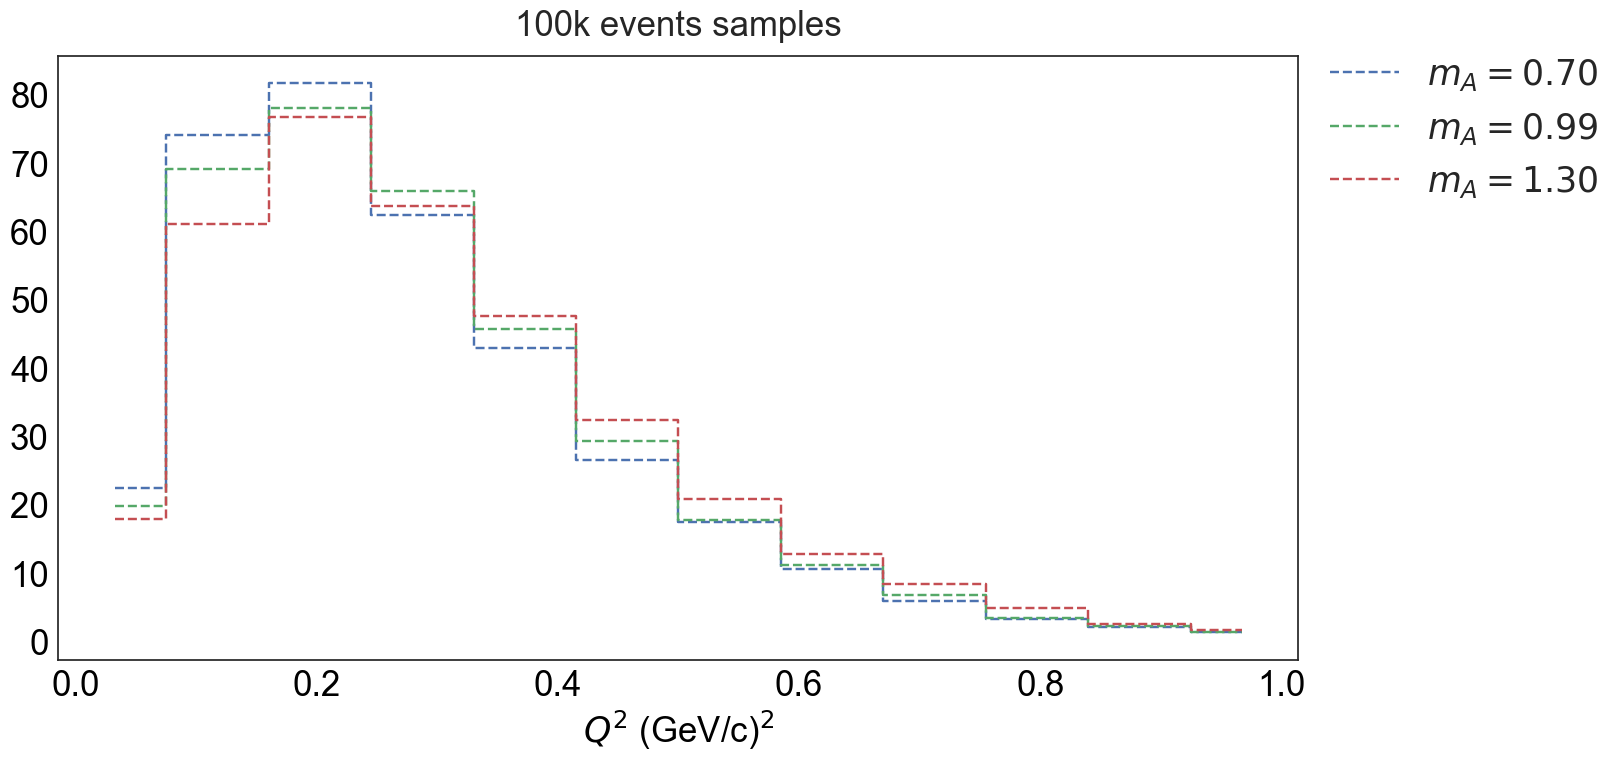

In [11]:
fig,ax=plt.subplots(figsize=(16,8))
bins=linspace(-0.01,1.01,13); mid=0.5*(bins[1:]+bins[:-1])
for mA in mA_array:
    sam = genie_CC1p0pi[mA]
#     plt.hist(sam['truth_Q2'],bins=linspace(-0.01,1.01,13),label='$mA=%.2f$'%mA,histtype='step',linewidth=3,normed=1)
#     plt.hist(sam['truth_Q2'],weights=sam['uBacc_muon_truth_proton'],bins=linspace(-0.01,1.01,13),label='$mA=%.2f$'%mA,histtype='step',linewidth=3,normed=1)
    hsim,_ = np.histogram(sam['truth_Q2'],weights=sam['uBacc_truth_muon_proton'],bins=bins)
    hsim = hsim*float(350)/np.sum(hsim)
    plt.step(mid,hsim,label=(r'$m_A=%.2f$'%mA),linestyle='--',where='mid')

set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=False,title='100k events samples')
plt.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)

## "reconstructed" - $Q^2$ distributions in GENIE simulations

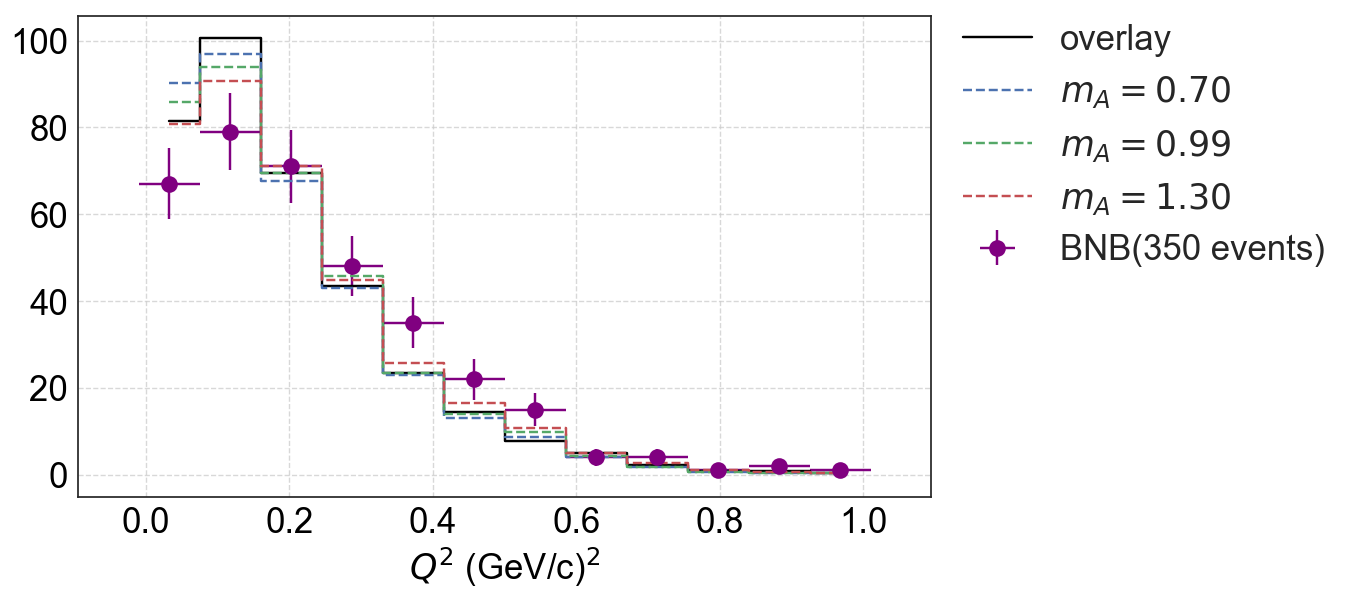

In [20]:
fig,ax=plt.subplots(figsize=(9.708,6))
bins=linspace(-0.01,1.01,13); mid=0.5*(bins[1:]+bins[:-1])
plot_OnBeam(OnBeamSample=selected_events,color='purple',ecolor='purple'
                                  ,var='reco_Q2', bins=bins, markersize=12, ax=ax, do_return_h=True)    
hsim,_ = np.histogram(selected_overlay_concat['reco_Q2'],bins=bins)
hsim = hsim*float(350)/np.sum(hsim)
plt.step(mid,hsim,label='overlay',color='black',linestyle='-',where='mid')

for mA in mA_array:
    sam = genie_CC1p0pi[mA]
    hsim,_ = np.histogram(sam['rec_Q2_gen_rec'],weights=sam['uBacc_truth_muon_proton'],bins=bins)
    hsim = hsim*float(350)/np.sum(hsim)
    plt.step(mid,hsim,label=(r'$m_A=%.2f$'%mA),linestyle='--',where='mid')
set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=False)
plt.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)

# 5e20POT  samples

In [9]:
genie_CC1p0pi_5e20POT = dict()
mA_array = [0.7,0.99,1.3]#[0.6,0.7,0.8,0.9,0.95,0.99,1.05,1.1,1.2,1.3,1.4]
for mA in mA_array: 
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/5e20_genie_samples/CC_4_9E20_POT_mA_%.2f.csv'%mA)
    genie_CC1p0pi_5e20POT[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi_5e20POT[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

36178 CC1p0π events in GENIE samples with mA=0.70
50071 CC1p0π events in GENIE samples with mA=0.99
63010 CC1p0π events in GENIE samples with mA=1.30


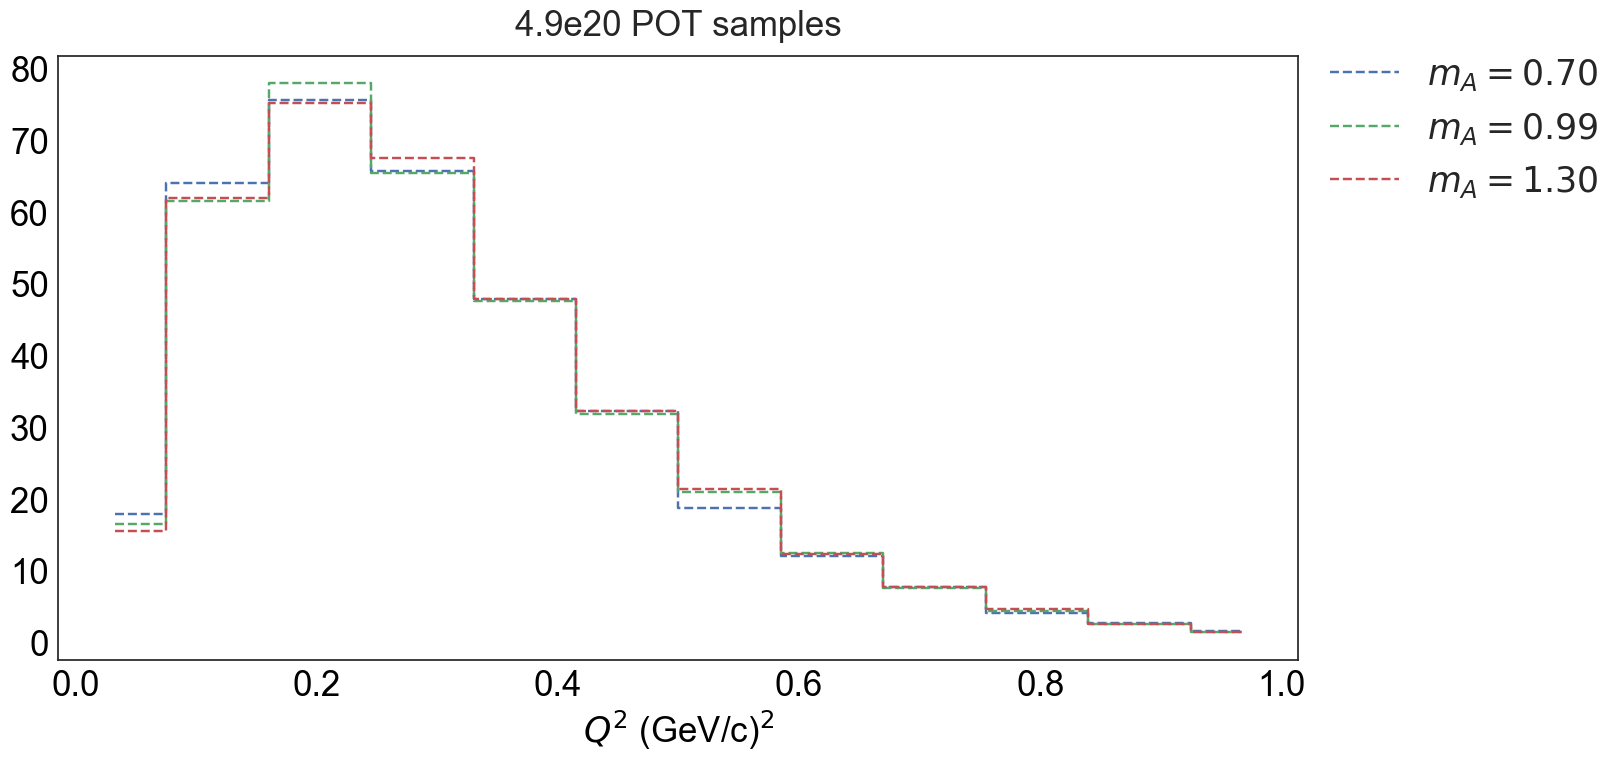

In [12]:
fig,ax=plt.subplots(figsize=(16,8))
bins=linspace(-0.01,1.01,13); mid=0.5*(bins[1:]+bins[:-1])
for mA in mA_array:
    sam = genie_CC1p0pi_5e20POT[mA]
    hsim,_ = np.histogram(sam['truth_Q2'],weights=sam['uBacc_muon_truth_proton'],bins=bins)
    hsim = hsim*float(350)/np.sum(hsim)
    plt.step(mid,hsim,label=(r'$m_A=%.2f$'%mA),linestyle='--',where='mid')
set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=False,title='4.9e20 POT samples')
plt.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)

In [7]:
mA=0.99
sim = genie_CC1p0pi[mA]
sim_FV = sample_in_FV(sample=sim)
sim_cuts = sim_FV[sim_FV['reco_l_mu']>sim_FV['reco_l_p']]

done.


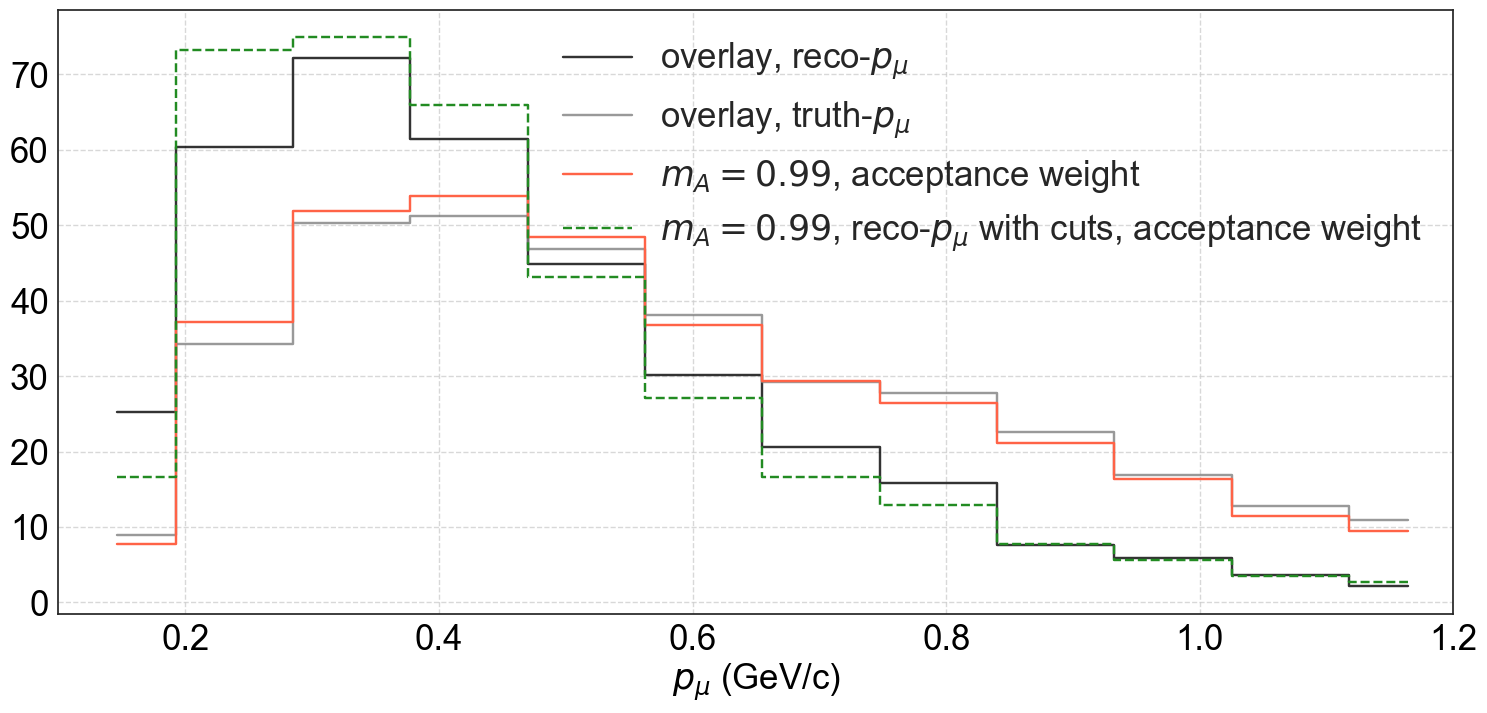

In [8]:
bins=linspace(0.1,1.21,13); mid=0.5*(bins[1:]+bins[:-1])
fig,ax=plt.subplots(figsize=(18,8));

# h_OnBeam,h_OnBeam_err=plot_OnBeam(OnBeamSample=selected_events,color='purple',ecolor='purple'
#                                  , var='reco_Pmu', bins=bins, markersize=12, ax=ax, do_return_h=True)    

for var,label,color in zip(['reco_Pmu','truth_Pmu']
                           ,[r'overlay, reco-$p_\mu$',r'overlay, truth-$p_\mu$']
                           ,['black','gray']):
    h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events)
                           , ax=ax , overlay_scaling=overlay_scaling , var=var
                           , bins=bins, do_individual_histograms=False
                           , stackColor=color,stackLabel=label)
# for weights,label,color in zip([None,sim['MicroBooNEWeight_Pmu_theta_Pp_theta']]                        
#                                ,['no weight',r'$\mu p$ acceptance weight']                      
#                                ,['royalblue','tomato']):
#     hsim,_ = np.histogram(sim['Pmu'],bins=bins,weights=weights)
#     hsim = hsim*float(np.sum(h_stack))/np.sum(hsim)
#     plt.step(mid,hsim,label=(r'$m_A=%.2f$, '%mA+label),color=color,linestyle='-',where='mid')

hsim,_ = np.histogram(sim['Pmu'],bins=bins,weights=sim['MicroBooNEWeight_Pmu_theta_Pp_theta'])
hsim = hsim*float(np.sum(h_stack))/np.sum(hsim)
plt.step(mid,hsim,label=(r'$m_A=%.2f$, acceptance weight'%mA),color='tomato',linestyle='-',where='mid')

    
# hsim,_ = np.histogram(sim['reco_Pmu'],bins=bins)
# hsim = hsim*float(np.sum(h_stack))/np.sum(hsim)
# plt.step(mid,hsim,label=(r'$m_A=%.2f$, reco-$p_\mu$'%mA),color='forestgreen',linestyle='-',where='mid')


hsim,_ = np.histogram(sim_cuts['reco_Pmu'],bins=bins,weights=sim_cuts['MicroBooNEWeight_Pmu_theta_Pp_theta'])
hsim = hsim*float(np.sum(h_stack))/np.sum(hsim)
plt.step(mid,hsim,label=(r'$m_A=%.2f$, reco-$p_\mu$ with cuts, acceptance weight'%mA),color='forestgreen',linestyle='--',where='mid')


set_axes(ax,r'$p_\mu$ (GeV/c)','',do_add_legend=True,xlim=(0.1,1.2))
print 'done.'

done.


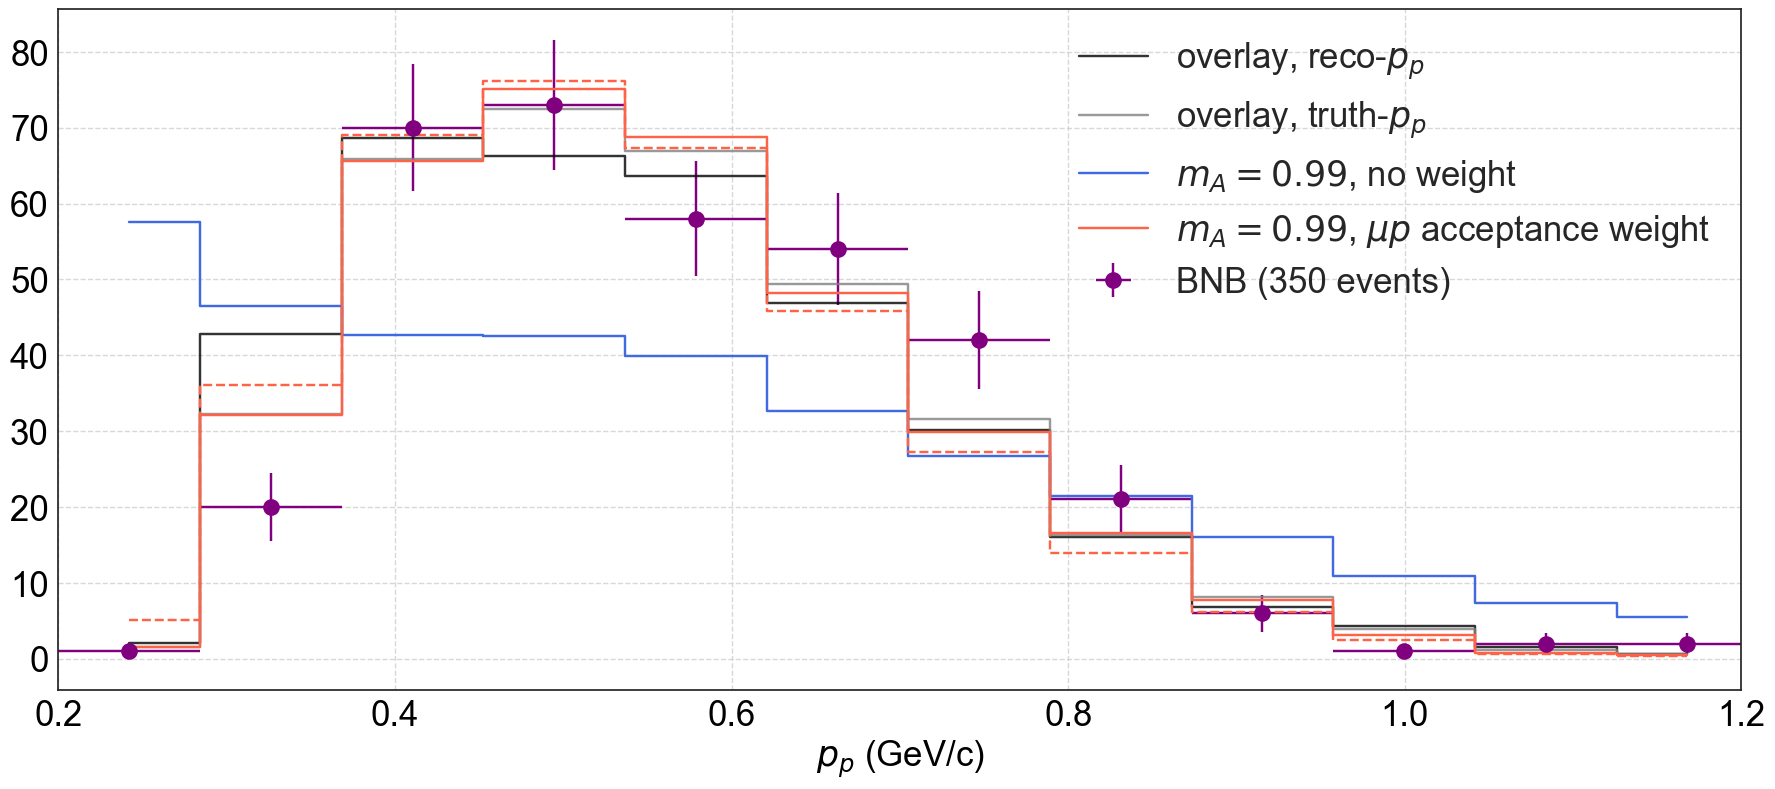

In [13]:
bins=linspace(0.2,1.21,13); mid=0.5*(bins[1:]+bins[:-1])
fig,ax=plt.subplots(figsize=(18,8));

h_OnBeam,h_OnBeam_err=plot_OnBeam(OnBeamSample=selected_events,color='purple',ecolor='purple'
                                  ,var='reco_Pp', bins=bins, markersize=12, ax=ax, do_return_h=True)    

for var,label,color in zip(['reco_Pp','truth_Pp']
                           ,[r'overlay, reco-$p_p$',r'overlay, truth-$p_p$']
                           ,['black','gray']):
    h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events)
                           , ax=ax , overlay_scaling=overlay_scaling , var=var
                           , bins=bins, do_individual_histograms=False
                           , stackColor=color,stackLabel=label)


mA=0.99
sim = genie_CC1p0pi[mA]
for weights,label,color in zip([None,sim['MicroBooNEWeight_Pmu_theta_Pp_theta']]
                         ,['no weight',r'$\mu p$ acceptance weight']
                         ,['royalblue','tomato']):
    hsim,_ = np.histogram(sim['Pp'],bins=bins,weights=weights)
    hsim = hsim*float(np.sum(h_stack))/np.sum(hsim)
    plt.step(mid,hsim,label=(r'$m_A=%.2f$, '%mA+label),color=color,linestyle='-',where='mid')

hsim,_ = np.histogram(sim['reco_Pp'],bins=bins,weights=sim['MicroBooNEWeight_Pmu_theta_Pp_theta'])
hsim = hsim*float(np.sum(h_stack))/np.sum(hsim)
plt.step(mid,hsim,label=(r'$m_A=%.2f$, '%mA+label),color='tomato',linestyle='--',where='mid')
    
    
set_axes(ax,r'$p_p$ (GeV/c)','',do_add_legend=True,xlim=(0.2,1.2))
print 'done.'

## Do we retain sensitivity to $m_A$?

done.


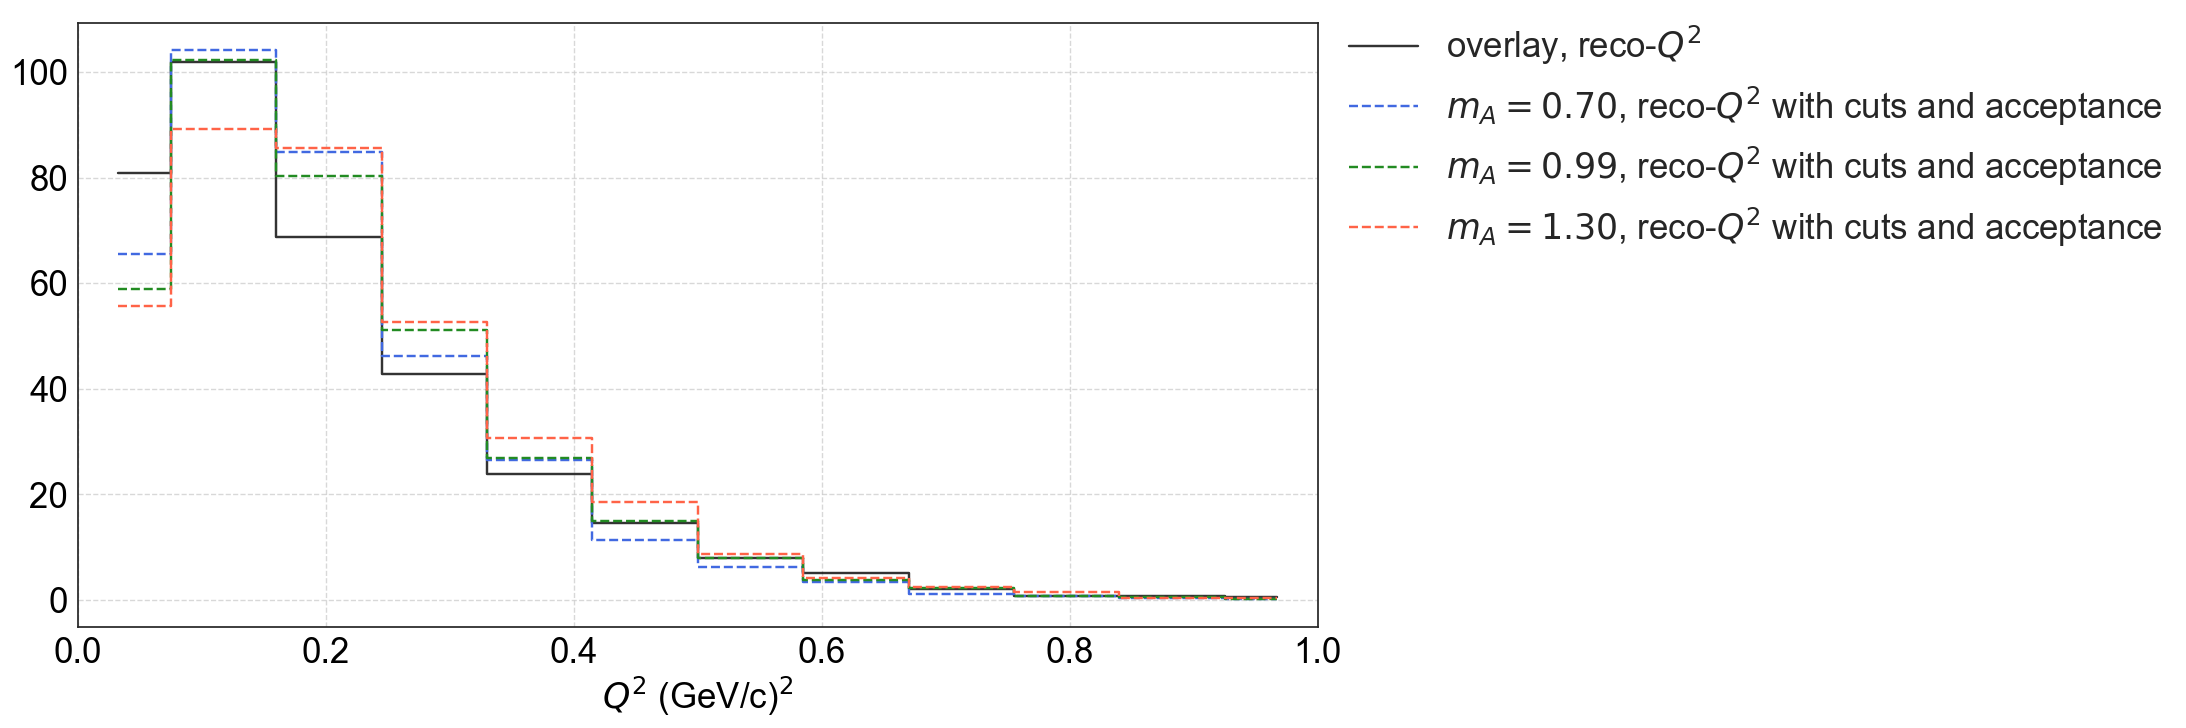

In [10]:
bins=linspace(-0.01,1.01,13); mid=0.5*(bins[1:]+bins[:-1])
fig,ax=plt.subplots(figsize=(16,8));

for var,label,color in zip(['reco_Q2']#,'truth_Q2']
                           ,[r'overlay, reco-$Q^2$',r'overlay, truth-$Q^2$']
                           ,['black','gray']):
    h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events)
                           , ax=ax , overlay_scaling=overlay_scaling , var=var
                           , bins=bins, do_individual_histograms=False
                           , stackColor=color,stackLabel=label)
    
for mA,color in zip([0.7,0.99,1.3],['royalblue','forestgreen','tomato']):
    sim = genie_CC1p0pi[mA]
    sim_FV = sample_in_FV(sample=sim)
    sim_cuts = sim_FV[sim_FV['reco_l_mu']>sim_FV['reco_l_p']]

    hsim,_ = np.histogram(sim_cuts['reco_Q2'],bins=bins,weights=sim_cuts['MicroBooNEWeight_Pmu_theta_Pp_theta'])
    hsim = hsim*float(np.sum(h_stack))/np.sum(hsim)
    plt.step(mid,hsim,label=(r'$m_A=%.2f$, reco-$Q^2$ with cuts and acceptance'%mA),color=color,linestyle='--',where='mid')

set_axes(ax,r'$Q^2$ (GeV/c)$^2$','',xlim=(0,1))
plt.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
print 'done.'

## $\chi^2$ comparison

In [42]:
bins=linspace(-0.01,1.01,9); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange = (0,1)

done.


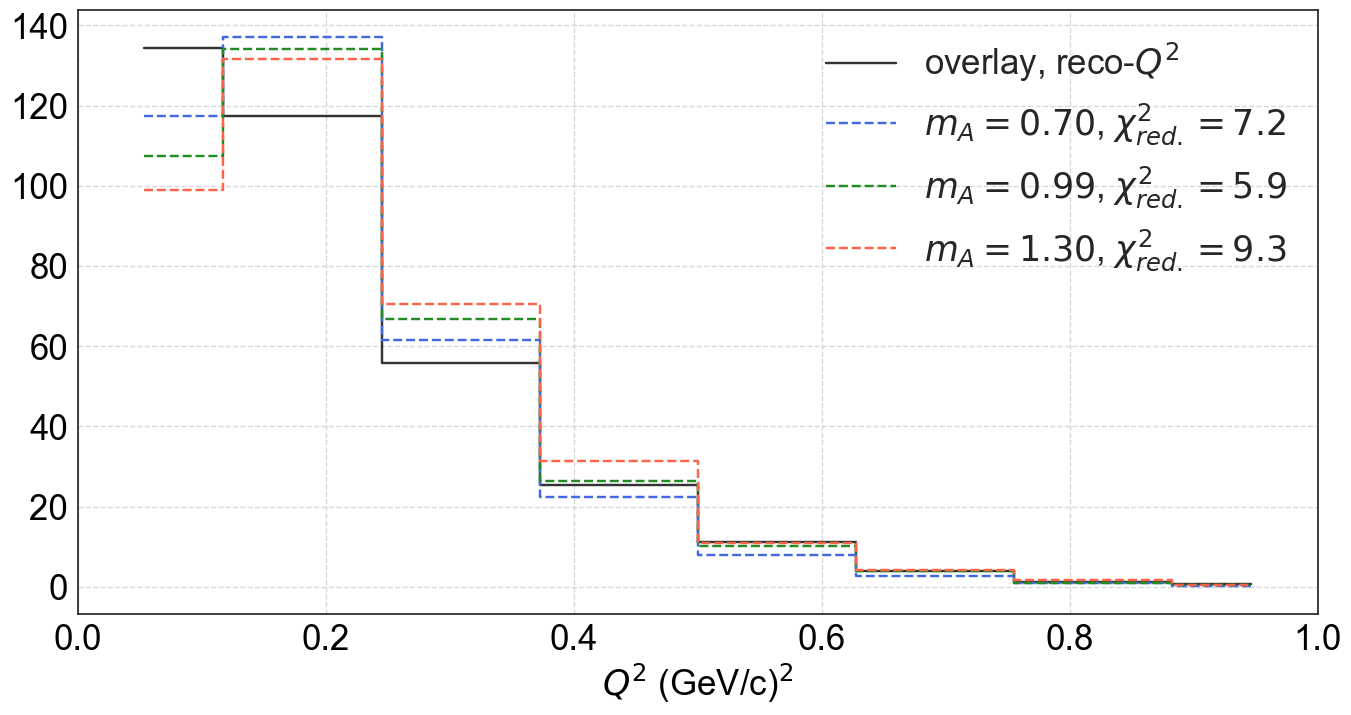

In [43]:
fig,ax=plt.subplots(figsize=(16,8));

for var,label,color in zip(['reco_Q2']#,'truth_Q2']
                           ,[r'overlay, reco-$Q^2$',r'overlay, truth-$Q^2$']
                           ,['black','gray']):
    h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events)
                           , ax=ax , overlay_scaling=overlay_scaling , var=var
                           , bins=bins, do_individual_histograms=False
                           , stackColor=color,stackLabel=label)

    
for mA,color in zip([0.7,0.99,1.3],['royalblue','forestgreen','tomato']):
    sim = genie_CC1p0pi[mA]
    sim_FV = sample_in_FV(sample=sim)
    sim_cuts = sim_FV[sim_FV['reco_l_mu']>sim_FV['reco_l_p']]

    hsim,hsim_err=np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        sim_in_bin = sim_cuts[(bins[i]<sim_cuts['reco_Q2'])& (sim_cuts['reco_Q2']<bins[i+1])]
        hsim[i] = np.sum(sim_in_bin['MicroBooNEWeight_Pmu_theta_Pp_theta'])
        hsim_err[i] = np.sqrt(np.sum(np.square(sim_in_bin['MicroBooNEWeight_Pmu_theta_Pp_theta'])))
    hsim_err = np.array(hsim_err)*float(np.sum(h_stack))/np.sum(hsim)
    hsim = np.array(hsim)*float(np.sum(h_stack))/np.sum(hsim)

    chi2,ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                     , h1=hsim    , h1err=hsim_err
                                     , h2=h_stack , h2err=h_stack_err
                                     , debug=0 if mA==0.99 else 0)

    
    plt.step(mid,hsim,label=(r'$m_A=%.2f$, $\chi^2_{red.}=%.1f$'%(mA,chi2/ndf)),color=color,linestyle='--',where='mid')

set_axes(ax,r'$Q^2$ (GeV/c)$^2$','',xlim=(0,1),do_add_legend=True)
print 'done.'

done.


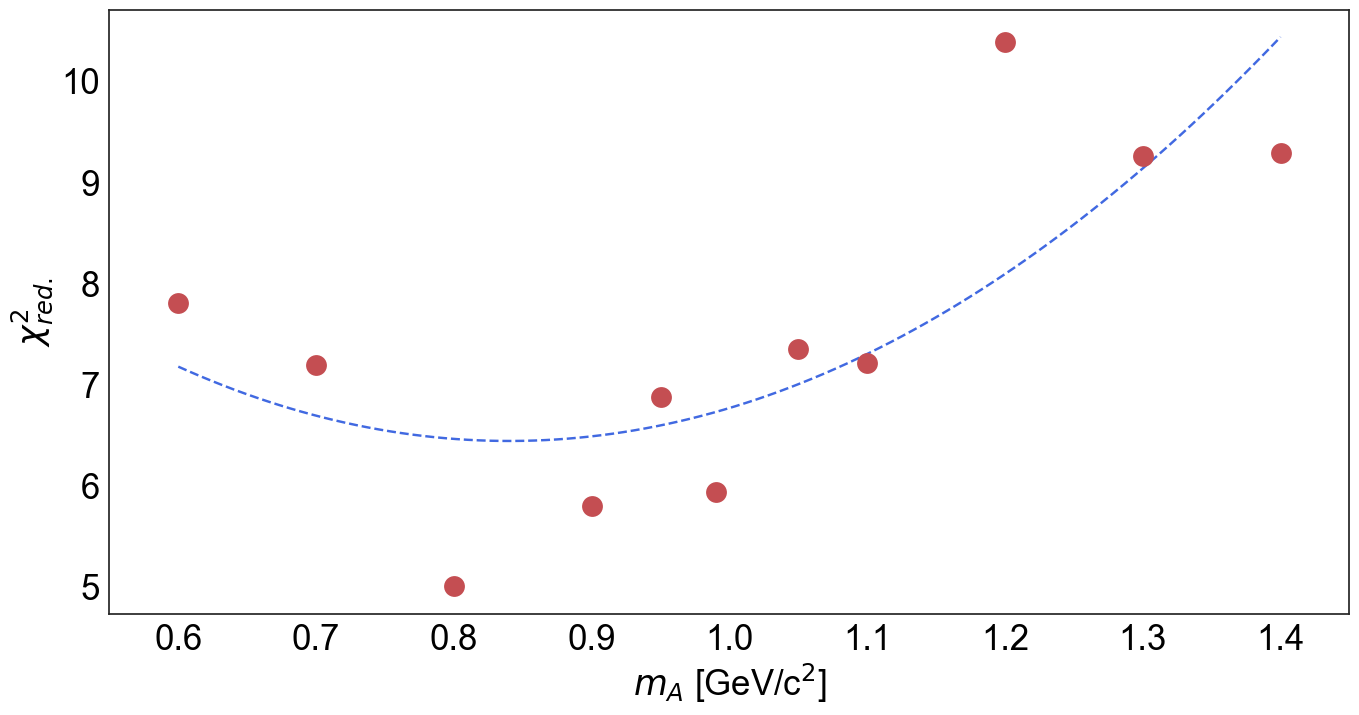

In [47]:
h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events),do_draw=False
                           , ax=ax , overlay_scaling=overlay_scaling , var='reco_Q2'
                           , bins=bins, do_individual_histograms=False)
   
results = pd.DataFrame(columns=['mA','chi2/ndf'])
for mA in mA_array:
    sim = genie_CC1p0pi[mA]
    sim_FV = sample_in_FV(sample=sim)
    sim_cuts = sim_FV[sim_FV['reco_l_mu']>sim_FV['reco_l_p']]
    
    hsim,hsim_err=np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        sim_in_bin = sim_cuts[(bins[i]<sim_cuts['reco_Q2'])& (sim_cuts['reco_Q2']<bins[i+1])]
        hsim[i] = np.sum(sim_in_bin['MicroBooNEWeight_Pmu_theta_Pp_theta'])
        hsim_err[i] = np.sqrt(np.sum(np.square(sim_in_bin['MicroBooNEWeight_Pmu_theta_Pp_theta'])))
    hsim_err = np.array(hsim_err)*float(np.sum(h_stack))/np.sum(hsim)
    hsim = np.array(hsim)*float(np.sum(h_stack))/np.sum(hsim)

    chi2,ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                     , h1=hsim    , h1err=hsim_err
                                     , h2=h_stack , h2err=h_stack_err
                                     , debug=0 if mA==0.99 else 0)
    
    results = results.append(pd.DataFrame({'mA':mA,'chi2/ndf':(chi2/ndf)},index=[mA]))
    
fig,ax=plt.subplots(figsize=(16,8));
x=results['mA']
y=results['chi2/ndf']
z = np.polyfit(x,y,deg=2)
poly = np.poly1d(z)

plt.errorbar(x=x,xerr=0,y=y,yerr=0,fmt='ro',color='red',markersize=15)
x_poly = linspace(0.6,1.4,100)
plt.plot(x_poly,poly(x_poly),'--',color='royalblue')

set_axes(ax,r'$m_A$ [GeV/c$^2$]','$\chi^2_{red.}$',xlim=(0.55,1.45))
print 'done.'

In [12]:
h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events),do_draw=False
                           , ax=ax , overlay_scaling=overlay_scaling , var='reco_Q2'
                           , bins=bins, do_individual_histograms=False
                           , stackColor=color,stackLabel=label)

sim_cuts = dict()
for mA in [0.6,0.7,0.8,0.9,0.95,0.99,1.05,1.1,1.2,1.3,1.4]:
    
    sim = genie_CC1p0pi[mA]
    sim_FV = sample_in_FV(sample=sim)
    sim_cuts = sim_FV[sim_FV['reco_l_mu']>sim_FV['reco_l_p']]

    hsim,hsim_err=np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        sim_in_bin = sim_cuts[(bins[i]<sim_cuts['reco_Q2'])& (sim_cuts['reco_Q2']<bins[i+1])]
        hsim[i] = np.sum(sim_in_bin['MicroBooNEWeight_Pmu_theta_Pp_theta'])
        hsim_err[i] = np.sqrt(np.sum(np.square(sim_in_bin['MicroBooNEWeight_Pmu_theta_Pp_theta'])))
    hsim_err = np.array(hsim_err)*float(np.sum(h_stack))/np.sum(hsim)
    hsim = np.array(hsim)*float(np.sum(h_stack))/np.sum(hsim)

    chi2,ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                     , h1=hsim    , h1err=hsim_err
                                     , h2=h_stack , h2err=h_stack_err
                                     , debug=0 if mA==0.99 else 0)

print 'done.'

IndentationError: expected an indented block (<ipython-input-12-b1a362b1d6aa>, line 3)

## and now add the beam data...

done.


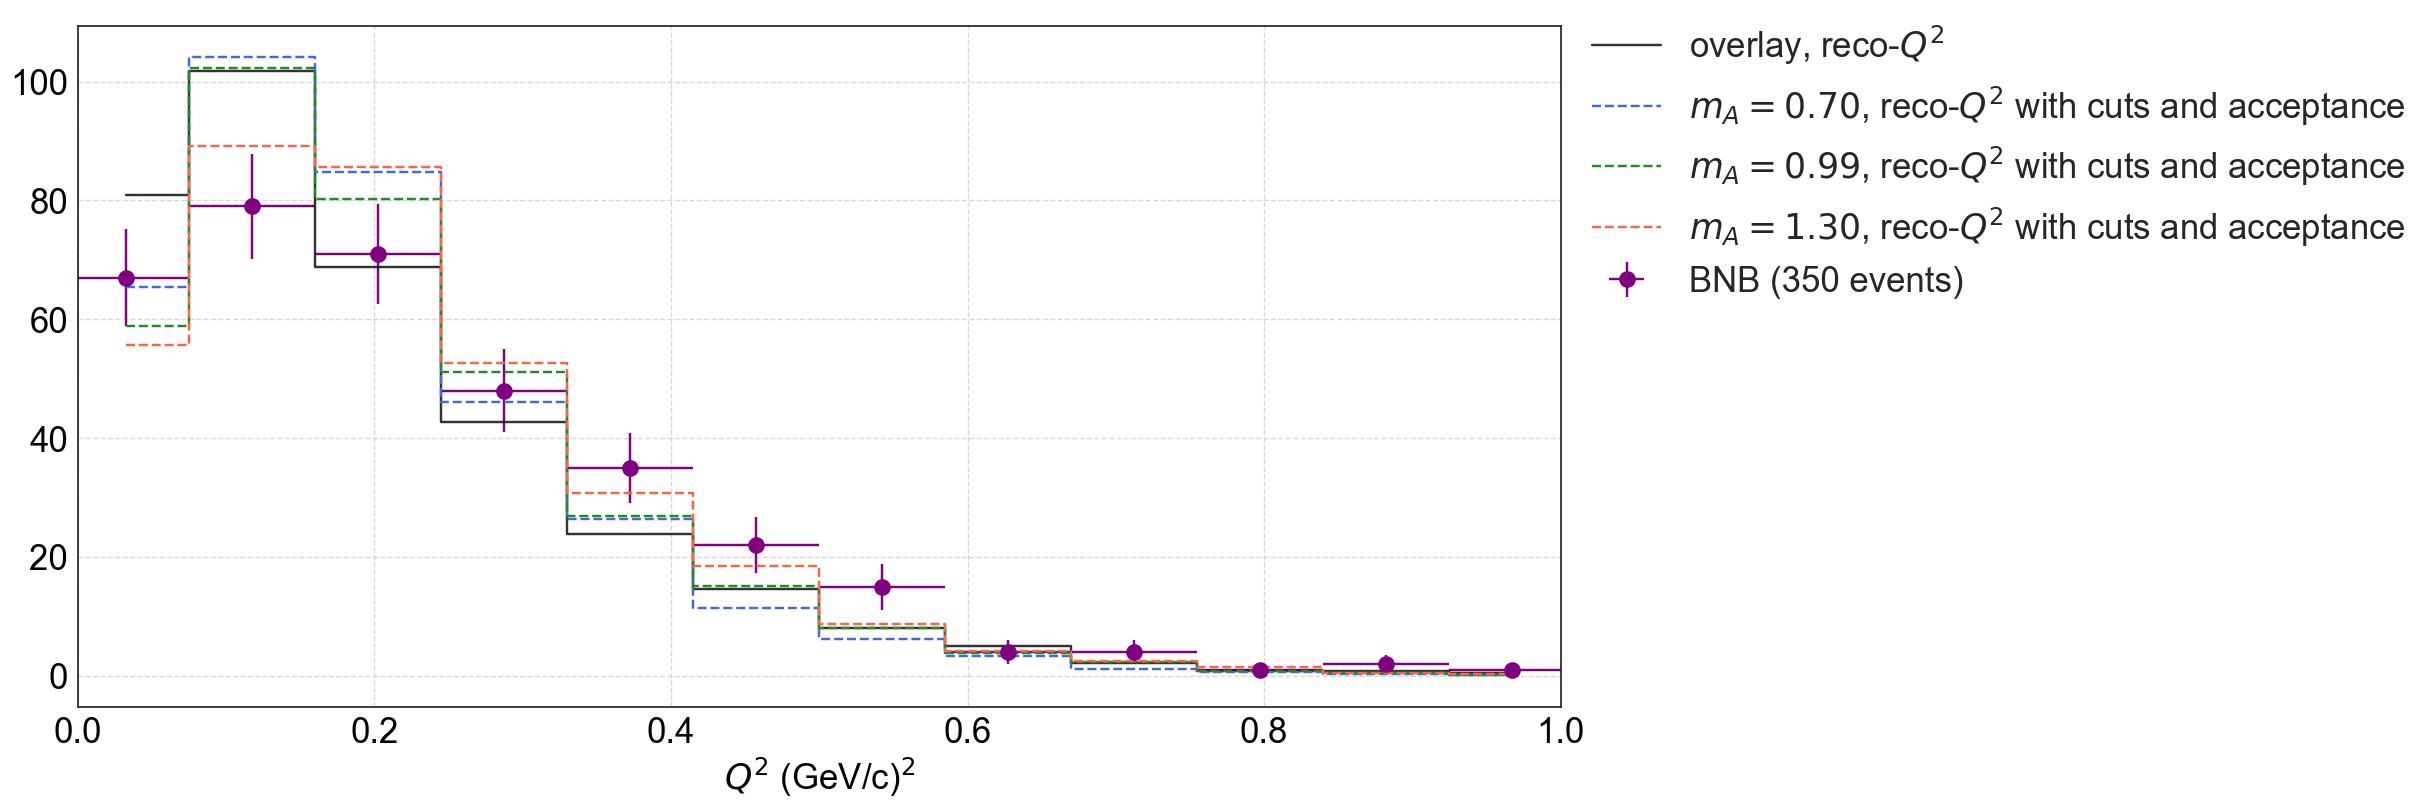

In [38]:
bins=linspace(-0.01,1.01,13); mid=0.5*(bins[1:]+bins[:-1])
fig,ax=plt.subplots(figsize=(16,8));
h_OnBeam,h_OnBeam_err=plot_OnBeam(OnBeamSample=selected_events,color='purple',ecolor='purple', var='reco_Q2', bins=bins, markersize=12, ax=ax, do_return_h=True)    

for var,label,color in zip(['reco_Q2']#,'truth_Q2']
                           ,[r'overlay, reco-$Q^2$',r'overlay, truth-$Q^2$']
                           ,['black','gray']):
    h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events)
                           , ax=ax , overlay_scaling=overlay_scaling , var=var
                           , bins=bins, do_individual_histograms=False
                           , stackColor=color,stackLabel=label)

    
for mA,color in zip([0.7,0.99,1.3],['royalblue','forestgreen','tomato']):
    sim = genie_CC1p0pi[mA]
    sim_FV = sample_in_FV(sample=sim)
    sim_cuts = sim_FV[sim_FV['reco_l_mu']>sim_FV['reco_l_p']]

    hsim,_ = np.histogram(sim_cuts['reco_Q2'],bins=bins,weights=sim_cuts['MicroBooNEWeight_Pmu_theta_Pp_theta'])
    hsim = hsim*float(np.sum(h_stack))/np.sum(hsim)
    plt.step(mid,hsim,label=(r'$m_A=%.2f$, reco-$Q^2$ with cuts and acceptance'%mA),color=color,linestyle='--',where='mid')

set_axes(ax,r'$Q^2$ (GeV/c)$^2$','',xlim=(0,1))
plt.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
print 'done.'

# ‘ruin’ $Q^2$ in GENIE to account for reconstruction?

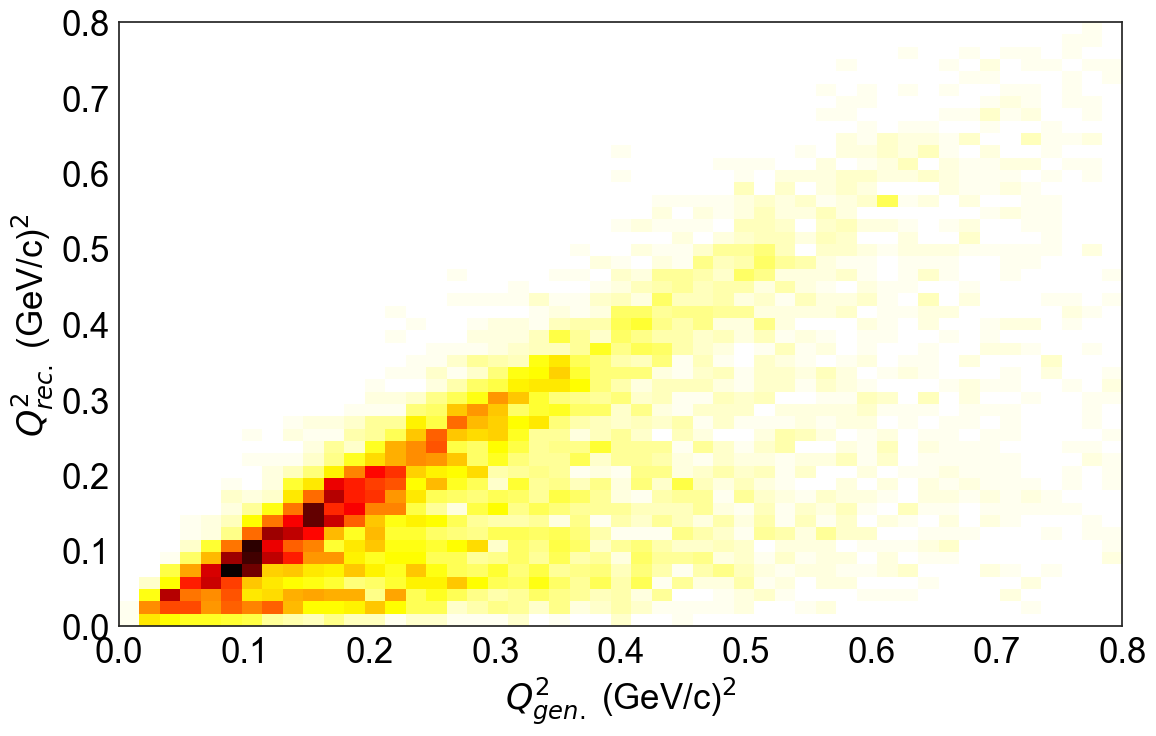

In [8]:
fig=plt.figure(figsize=(12.944,8))
ax=fig.add_subplot(1,1,1)
plot_2d_hist(selected_CC1p0pi['truth_Q2'],selected_CC1p0pi['reco_Q2'],bins=linspace(0,0.8,50),ax=ax)
set_axes(ax,r'$Q^2_{gen.}$ (GeV/c)$^2$',r'$Q^2_{rec.}$ (GeV/c)$^2$')

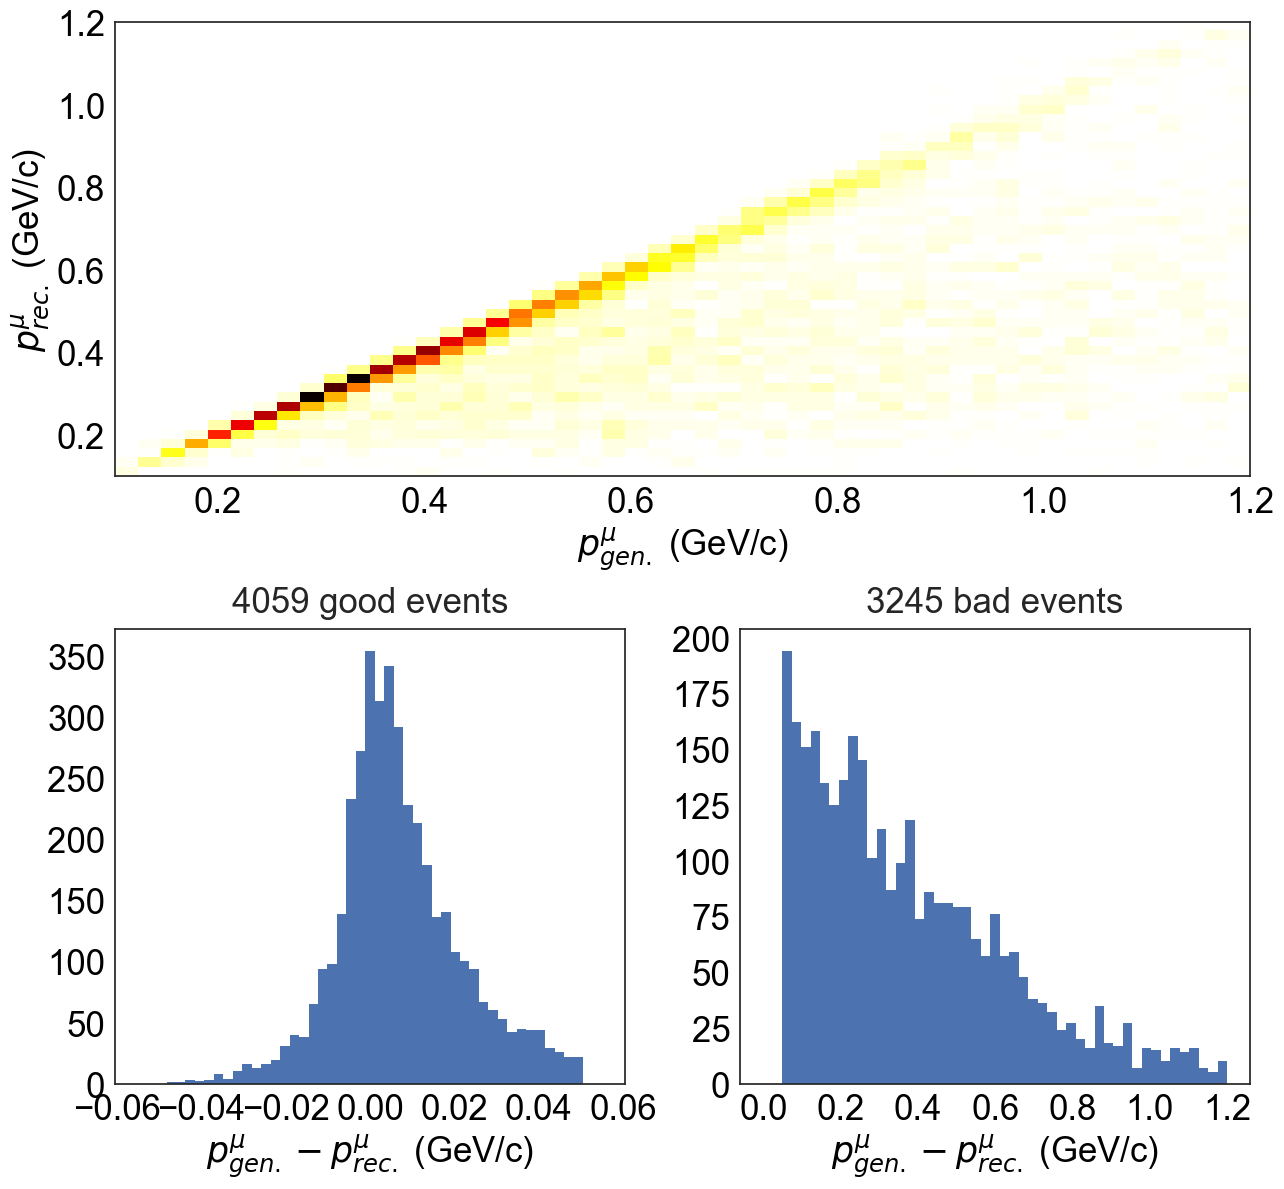

In [9]:
fig=plt.figure(figsize=(12.944,12))
ax=fig.add_subplot(2,2,(1,2))

sam = selected_CC1p0pi
gen = sam['truth_Pmu']
rec = sam['reco_Pmu']
eps = 0.05
plot_2d_hist(gen,rec,bins=linspace(0.1,1.2,50),ax=ax)
set_axes(ax,r'$p^\mu_{gen.}$ (GeV/c)',r'$p^\mu_{rec.}$ (GeV/c)')


ax=fig.add_subplot(2,2,3)
good = sam[np.abs(gen-rec)<eps]
gen_good = good['truth_Pmu']
rec_good = good['reco_Pmu']
plt.hist(gen_good-rec_good,bins=linspace(-1.1*eps,1.1*eps,50))
set_axes(ax,r'$p^\mu_{gen.}-p^\mu_{rec.}$ (GeV/c)',title='%d good events'%len(good))



ax=fig.add_subplot(2,2,4)
bad = sam[np.abs(gen-rec)>eps]
gen_bad = bad['truth_Pmu']
rec_bad = bad['reco_Pmu']
plt.hist(gen_bad-rec_bad,bins=linspace(0,1.2,50))
set_axes(ax,r'$p^\mu_{gen.}-p^\mu_{rec.}$ (GeV/c)',title='%d bad events'%len(bad))

plt.tight_layout()

In [8]:

def pow_func(x, a, b, c):
    return a*np.power(x,b) + c


def momentum_correction(sam = None):
    x = 180./np.pi*sam['reco_Pmu_theta']
    y_reco = sam['reco_Pmu']
    y_true = sam['truth_Pmu']
    popt=dict()
    for y,color,ylabel in zip([y_true,y_reco]
                              ,['blue','tomato']
                              ,['gen.','reco.']):
        popt[ylabel], pcov = curve_fit(pow_func, x, y , (1,-0.5,0), maxfev=5000)
    y_corr = y_reco + pow_func(x, *popt['gen.']) - pow_func(x, *popt['reco.'])
    popt['corr.'], pcov = curve_fit(pow_func, x, y_corr , (1,-0.5,0), maxfev=5000)
    y = dict({'reco.':y_reco,'gen.':y_true,'corr.':y_corr})
    return y,popt


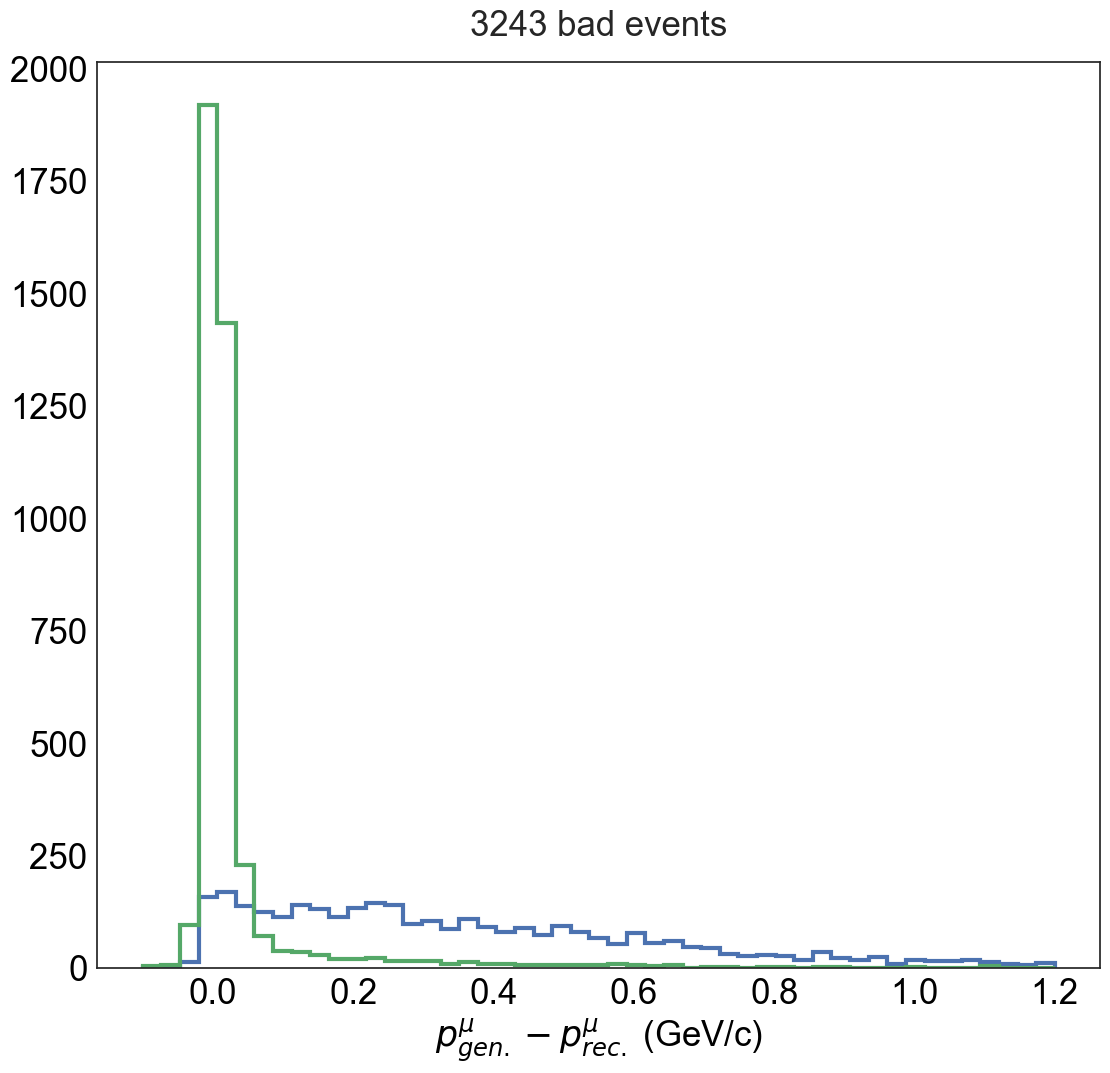

In [7]:
recbad = selected_CC1p0pi[((selected_CC1p0pi['endz_muCandidate']>1020)
                          |(np.abs(selected_CC1p0pi['endy_muCandidate'])>100)
                          |(np.abs(selected_CC1p0pi['endz_muCandidate']-700.5)<0.5))==True]
recgood = selected_CC1p0pi[((selected_CC1p0pi['endz_muCandidate']>1020)
                          |(np.abs(selected_CC1p0pi['endy_muCandidate'])>100)
                          |(np.abs(selected_CC1p0pi['endz_muCandidate']-700.5)<0.5))==False]

fig,ax=plt.subplots(figsize=(12.944,12))
gen_recbad = recbad['truth_Pmu']
rec_recbad = recbad['reco_Pmu']
plt.hist(gen_recbad-rec_recbad,bins=linspace(-0.1,1.2,50),histtype='step',linewidth=3)

gen_recgood = recgood['truth_Pmu']
rec_recgood = recgood['reco_Pmu']
plt.hist(gen_recgood-rec_recgood,bins=linspace(-0.1,1.2,50),histtype='step',linewidth=3)
set_axes(ax,r'$p^\mu_{gen.}-p^\mu_{rec.}$ (GeV/c)',title='%d bad events'%len(recbad))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


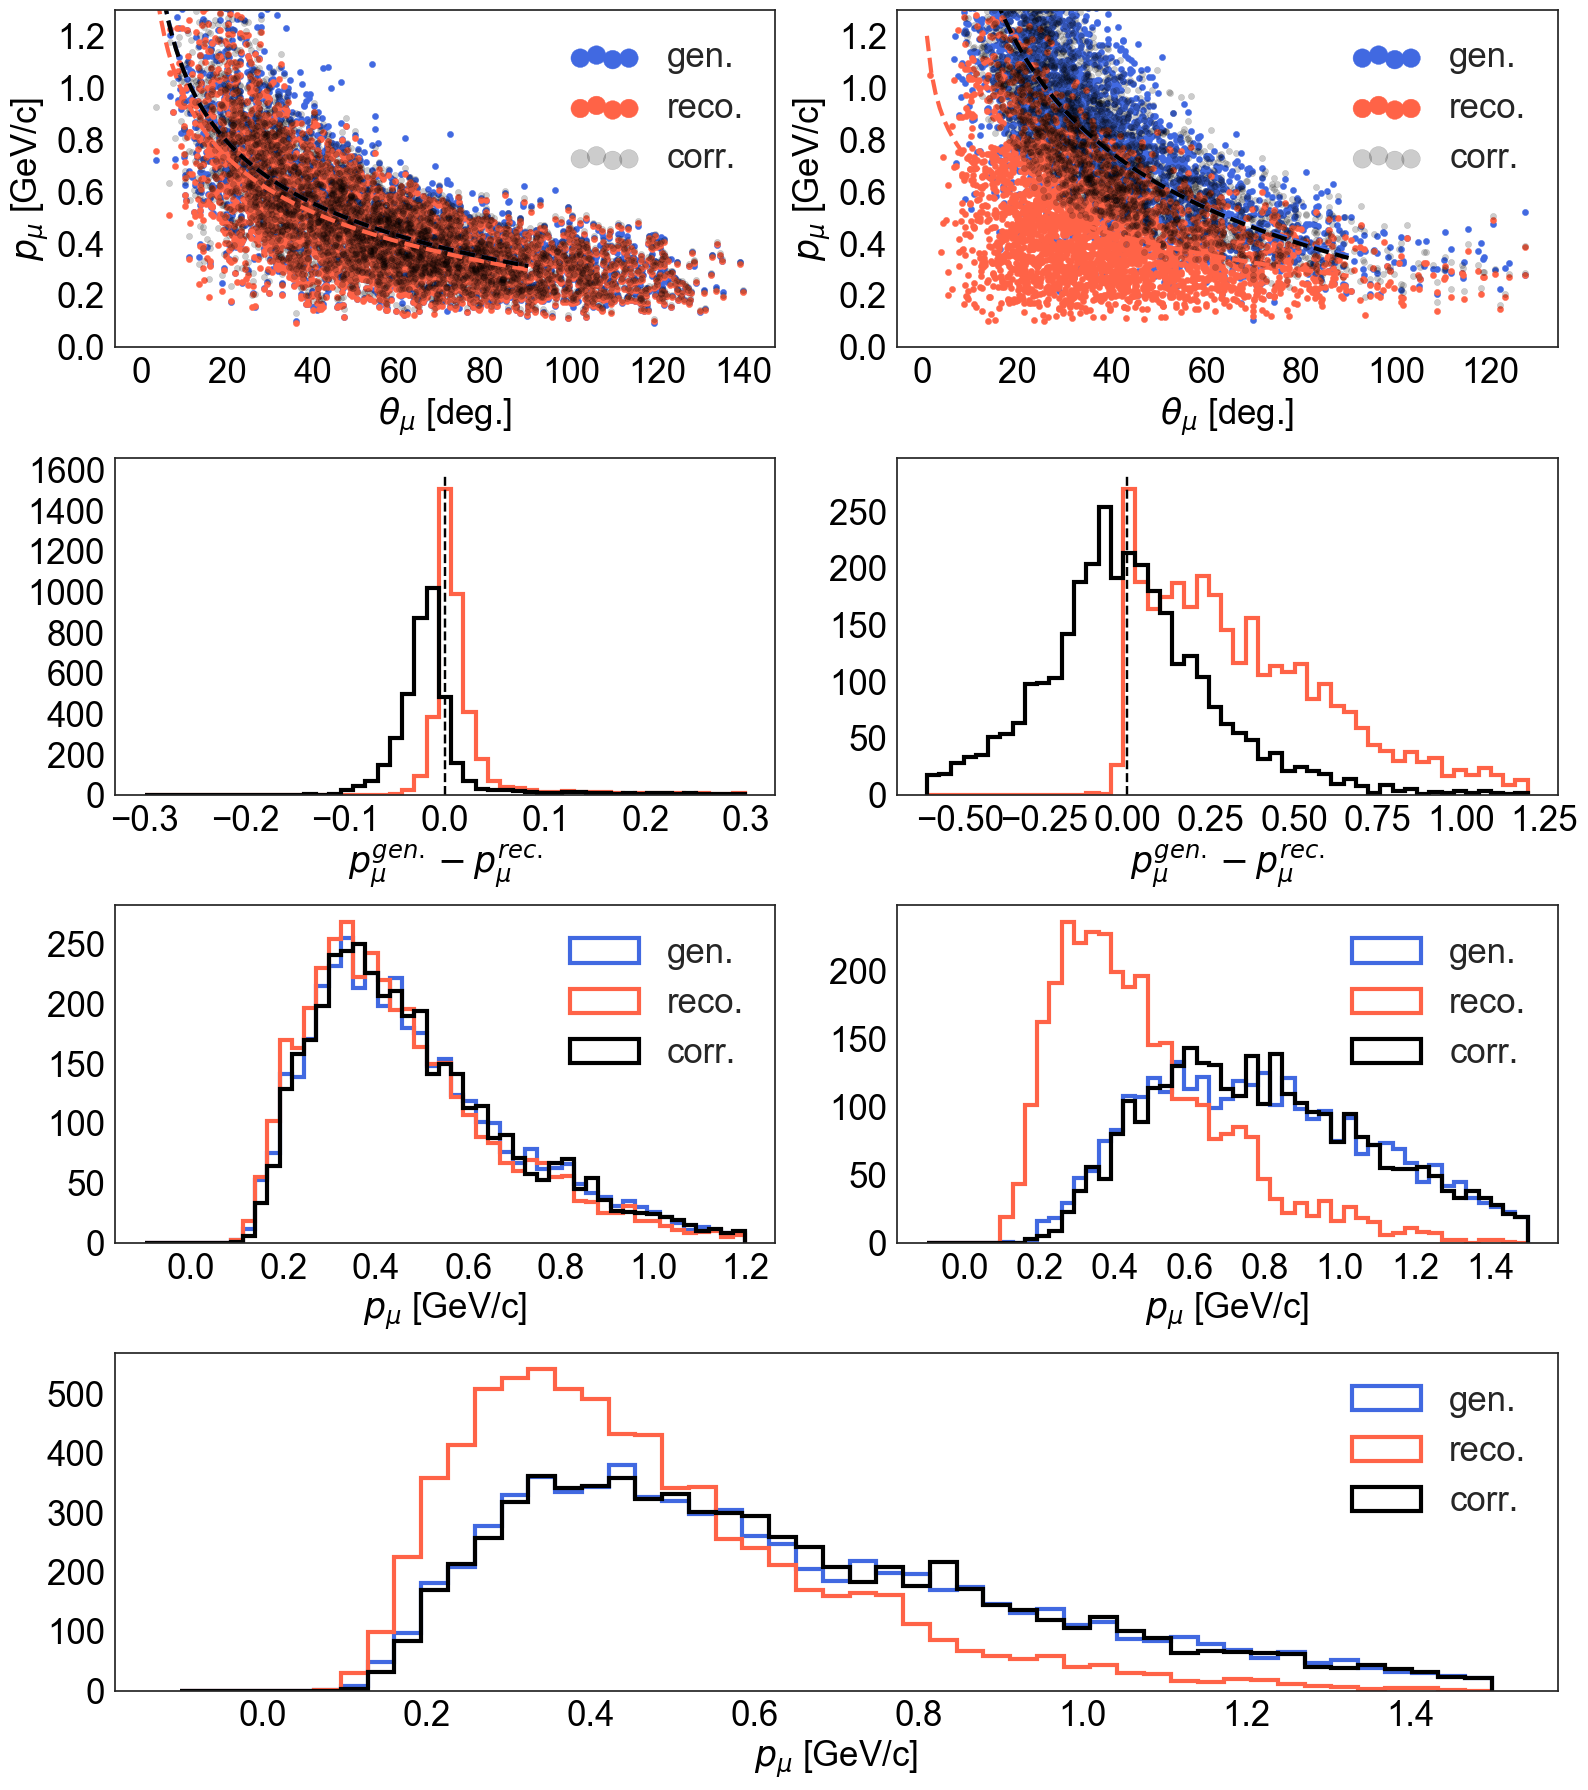

In [10]:
fig=plt.figure(figsize=(16,18))
x_fit = linspace(0 ,90, 100)

# rec-'GOOD' sample
ax=fig.add_subplot(4,2,1)
y_good,popt_good = momentum_correction(sam = recgood)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    x = 180./np.pi*recgood['reco_Pmu_theta']
    y = y_good[ylabel]
    plt.scatter(x,y,color=color,s=20,label=ylabel,alpha=0.2 if ylabel=='corr.' else 1)
    if ylabel!=2: 
        plt.plot(x_fit, pow_func(x_fit, *popt_good[ylabel]), '--', c=color,linewidth=3)
ax.legend(fontsize=25 , markerscale=3., scatterpoints=4 )
set_axes(ax,r'$\theta_\mu$ [deg.]',r'$p_\mu$ [GeV/c]',ylim=(0,1.3))


# correction result
ax=fig.add_subplot(4,2,3)
bins=linspace(-0.3,0.3,50)
plt.hist(y_good['gen.']-y_good['reco.'],bins=bins,histtype='step',linewidth=3,color='tomato'
         ,label='before corr., mean=%.2f'%np.mean(y_good['gen.']-y_good['reco.']))
plt.hist(y_good['gen.']-y_good['corr.'],bins=bins,histtype='step',linewidth=3,color='black'
         ,label='after corr., mean=%.2f'%np.mean(y_good['gen.']-y_good['corr.']))

plt.plot([0,0],ax.get_ylim(),'--',color='black')    
set_axes(ax,r'$p^{gen.}_{\mu}-p^{rec.}_{\mu}$',do_add_legend=False)


ax=fig.add_subplot(4,2,5)
bins=linspace(-0.1,1.2,50)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    plt.hist(y_good[ylabel],bins=bins,histtype='step',linewidth=3,color=color,label=ylabel)
set_axes(ax,r'$p_{\mu}$ [GeV/c]',do_add_legend=True)



# 'BAD' sample
ax=fig.add_subplot(4,2,2)
y_bad,popt_bad = momentum_correction(sam = recbad)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    x = 180./np.pi*recbad['reco_Pmu_theta']
    y = y_bad[ylabel]
    plt.scatter(x,y,color=color,s=20,label=ylabel,alpha=0.2 if ylabel=='corr.' else 1)
    if ylabel!=2: 
        plt.plot(x_fit, pow_func(x_fit, *popt_bad[ylabel]), '--', c=color,linewidth=3)
ax.legend(fontsize=25 , markerscale=3., scatterpoints=4 )
set_axes(ax,r'$\theta_\mu$ [deg.]',r'$p_\mu$ [GeV/c]',ylim=(0,1.3))


# correction result
ax=fig.add_subplot(4,2,4)
bins=linspace(-0.6,1.2,50)
plt.hist(y_bad['gen.']-y_bad['reco.'],bins=bins,histtype='step',linewidth=3,color='tomato'
         ,label='before corr., mean=%.2f'%np.mean(y_bad['gen.']-y_bad['reco.']))
plt.hist(y_bad['gen.']-y_bad['corr.'],bins=bins,histtype='step',linewidth=3,color='black'
         ,label='after corr., mean=%.2f'%np.mean(y_bad['gen.']-y_bad['corr.']))

plt.plot([0,0],ax.get_ylim(),'--',color='black')    
set_axes(ax,r'$p^{gen.}_{\mu}-p^{rec.}_{\mu}$',do_add_legend=False)


# correction result
ax=fig.add_subplot(4,2,6)
bins=linspace(-0.1,1.5,50)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    plt.hist(y_bad[ylabel],bins=bins,histtype='step',linewidth=3,color=color,label=ylabel)
set_axes(ax,r'$p_{\mu}$ [GeV/c]',do_add_legend=True)


ax=fig.add_subplot(4,2,(7,8))
bins=linspace(-0.1,1.5,50)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    y_concat = np.concatenate([y_good[ylabel],y_bad[ylabel]])
    plt.hist(y_concat,bins=bins,histtype='step',linewidth=3,color=color,label=ylabel)
set_axes(ax,r'$p_{\mu}$ [GeV/c]',do_add_legend=True)


plt.tight_layout()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


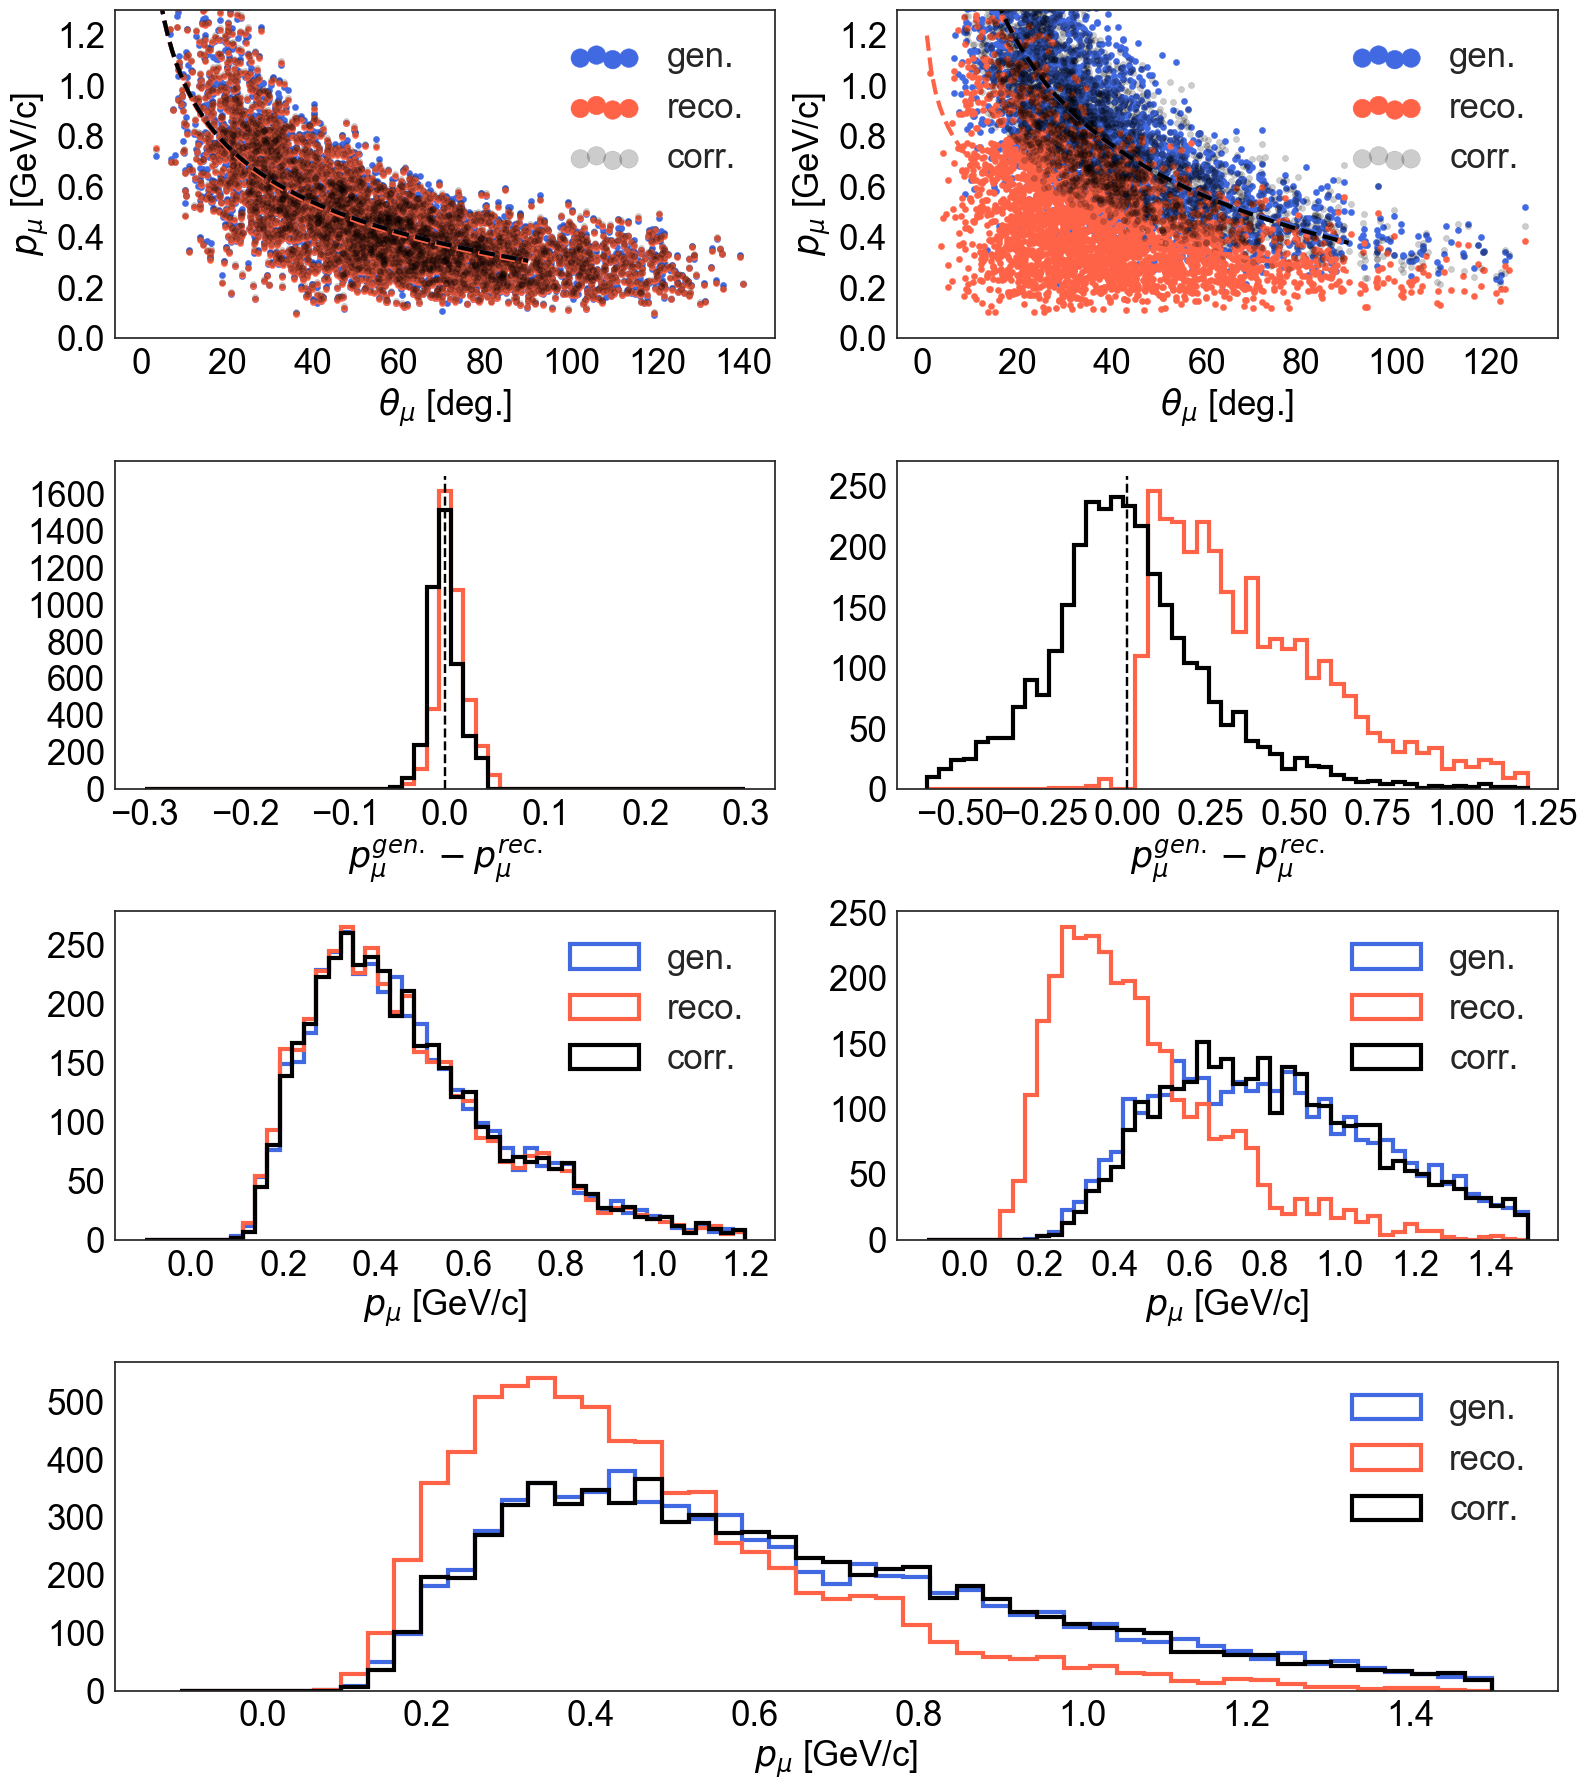

In [11]:
fig=plt.figure(figsize=(16,18))
x_fit = linspace(0 ,90, 100)

# 'GOOD' sample
ax=fig.add_subplot(4,2,1)
y_good,popt_good = momentum_correction(sam = good)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    x = 180./np.pi*good['reco_Pmu_theta']
    y = y_good[ylabel]
    plt.scatter(x,y,color=color,s=20,label=ylabel,alpha=0.2 if ylabel=='corr.' else 1)
    if ylabel!=2: 
        plt.plot(x_fit, pow_func(x_fit, *popt_good[ylabel]), '--', c=color,linewidth=3)
ax.legend(fontsize=25 , markerscale=3., scatterpoints=4 )
set_axes(ax,r'$\theta_\mu$ [deg.]',r'$p_\mu$ [GeV/c]',ylim=(0,1.3))


# correction result
ax=fig.add_subplot(4,2,3)
bins=linspace(-0.3,0.3,50)
plt.hist(y_good['gen.']-y_good['reco.'],bins=bins,histtype='step',linewidth=3,color='tomato'
         ,label='before corr., mean=%.2f'%np.mean(y_good['gen.']-y_good['reco.']))
plt.hist(y_good['gen.']-y_good['corr.'],bins=bins,histtype='step',linewidth=3,color='black'
         ,label='after corr., mean=%.2f'%np.mean(y_good['gen.']-y_good['corr.']))

plt.plot([0,0],ax.get_ylim(),'--',color='black')    
set_axes(ax,r'$p^{gen.}_{\mu}-p^{rec.}_{\mu}$',do_add_legend=False)


# correction result
ax=fig.add_subplot(4,2,5)
bins=linspace(-0.1,1.2,50)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    plt.hist(y_good[ylabel],bins=bins,histtype='step',linewidth=3,color=color,label=ylabel)
set_axes(ax,r'$p_{\mu}$ [GeV/c]',do_add_legend=True)



# 'BAD' sample
ax=fig.add_subplot(4,2,2)
y_bad,popt_bad = momentum_correction(sam = bad)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    x = 180./np.pi*bad['reco_Pmu_theta']
    y = y_bad[ylabel]
    plt.scatter(x,y,color=color,s=20,label=ylabel,alpha=0.2 if ylabel=='corr.' else 1)
    if ylabel!=2: 
        plt.plot(x_fit, pow_func(x_fit, *popt_bad[ylabel]), '--', c=color,linewidth=3)
ax.legend(fontsize=25 , markerscale=3., scatterpoints=4 )
set_axes(ax,r'$\theta_\mu$ [deg.]',r'$p_\mu$ [GeV/c]',ylim=(0,1.3))


# correction result
ax=fig.add_subplot(4,2,4)
bins=linspace(-0.6,1.2,50)
plt.hist(y_bad['gen.']-y_bad['reco.'],bins=bins,histtype='step',linewidth=3,color='tomato'
         ,label='before corr., mean=%.2f'%np.mean(y_bad['gen.']-y_bad['reco.']))
plt.hist(y_bad['gen.']-y_bad['corr.'],bins=bins,histtype='step',linewidth=3,color='black'
         ,label='after corr., mean=%.2f'%np.mean(y_bad['gen.']-y_bad['corr.']))

plt.plot([0,0],ax.get_ylim(),'--',color='black')    
set_axes(ax,r'$p^{gen.}_{\mu}-p^{rec.}_{\mu}$',do_add_legend=False)


# correction result
ax=fig.add_subplot(4,2,6)
bins=linspace(-0.1,1.5,50)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    plt.hist(y_bad[ylabel],bins=bins,histtype='step',linewidth=3,color=color,label=ylabel)
set_axes(ax,r'$p_{\mu}$ [GeV/c]',do_add_legend=True)


# correction result
ax=fig.add_subplot(4,2,(7,8))
bins=linspace(-0.1,1.5,50)
for ylabel,color in zip(['gen.','reco.','corr.'],['royalblue','tomato','black']):
    y_concat = np.concatenate([y_good[ylabel],y_bad[ylabel]])
    plt.hist(y_concat,bins=bins,histtype='step',linewidth=3,color=color,label=ylabel)
set_axes(ax,r'$p_{\mu}$ [GeV/c]',do_add_legend=True)

plt.tight_layout()

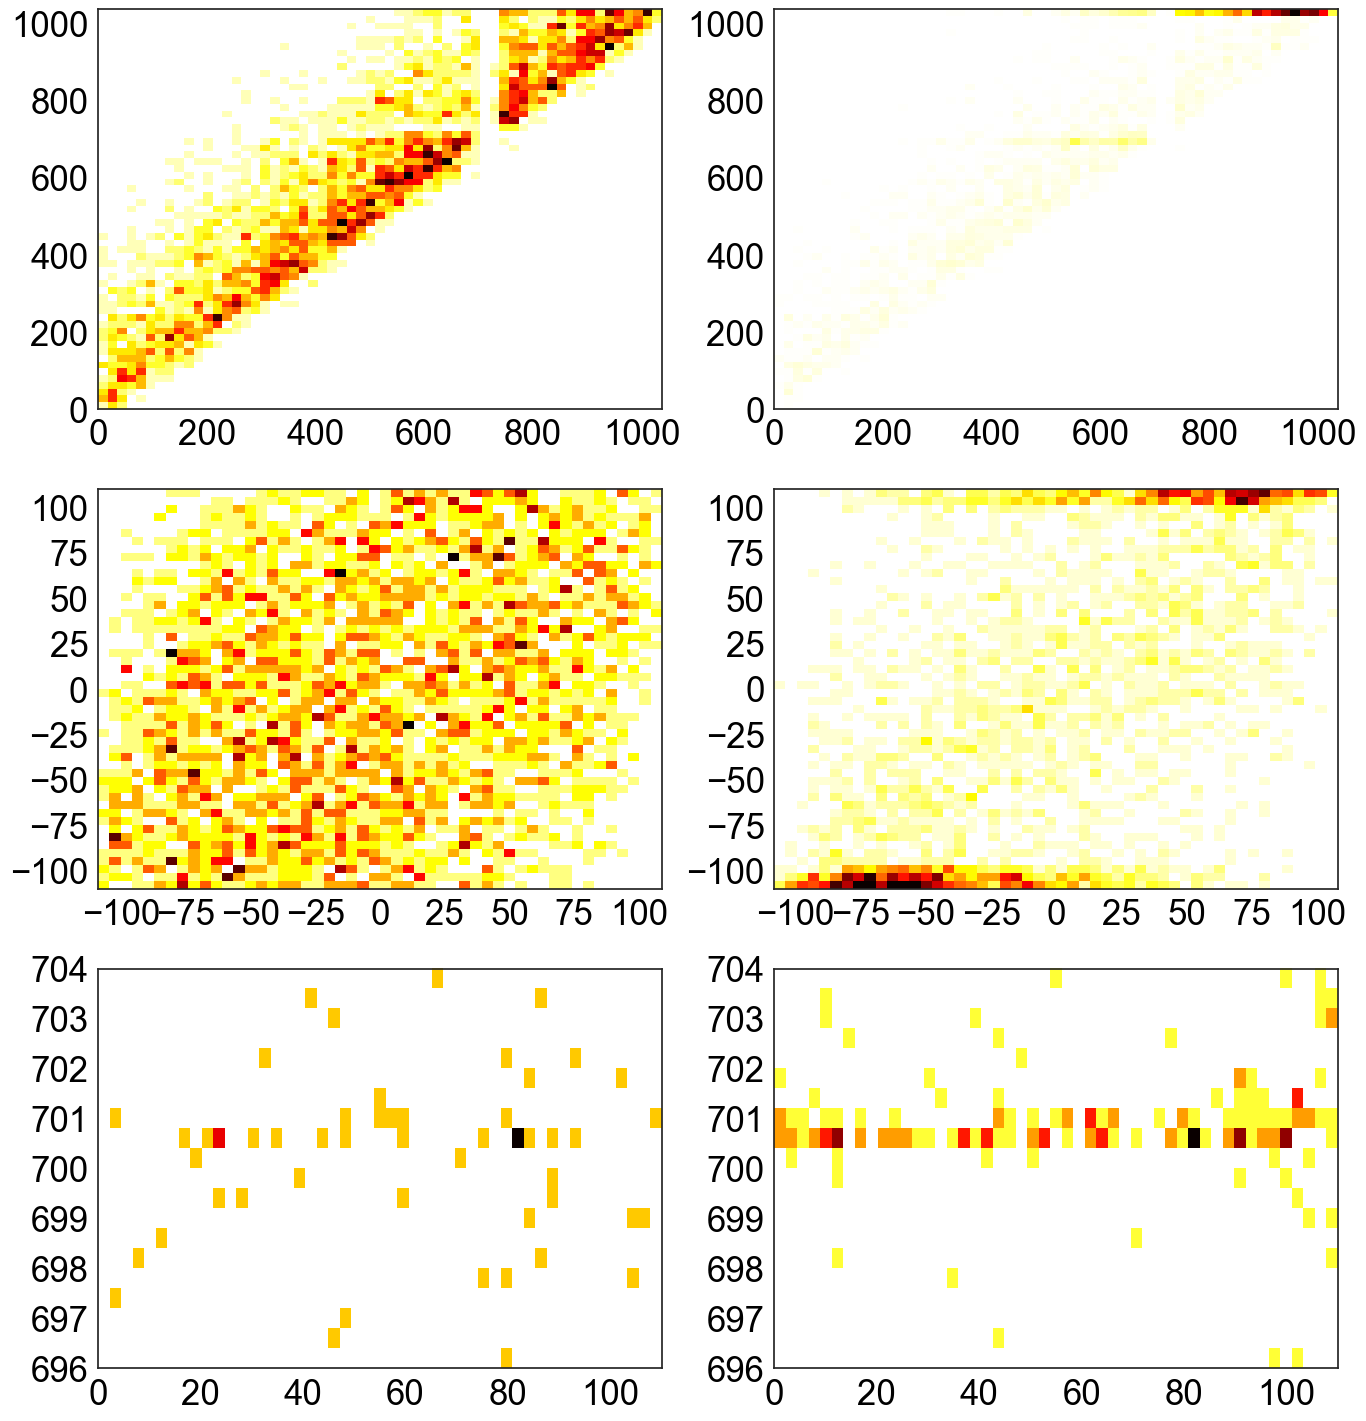

In [20]:
fig=plt.figure(figsize=(16,18))
# 'GOOD' vs. 'BAD' samples - how can we find them?
for i,sam in enumerate([good,bad]):
    plot_2d_hist(sam['startz_muCandidate'],sam['endz_muCandidate'],ax=fig.add_subplot(3,2,1+i),bins=linspace(0,1037,60))
    plot_2d_hist(sam['starty_muCandidate'],sam['endy_muCandidate'],ax=fig.add_subplot(3,2,3+i))
#     plot_2d_hist(np.abs(sam['endy_muCandidate']),sam['endz_muCandidate'],ax=fig.add_subplot(3,2,5+i))        
    plot_2d_hist(np.abs(sam['endy_muCandidate']),sam['endz_muCandidate'],ax=fig.add_subplot(3,2,5+i)
                 ,bins=(linspace(0,110,50),linspace(696,704,21)))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


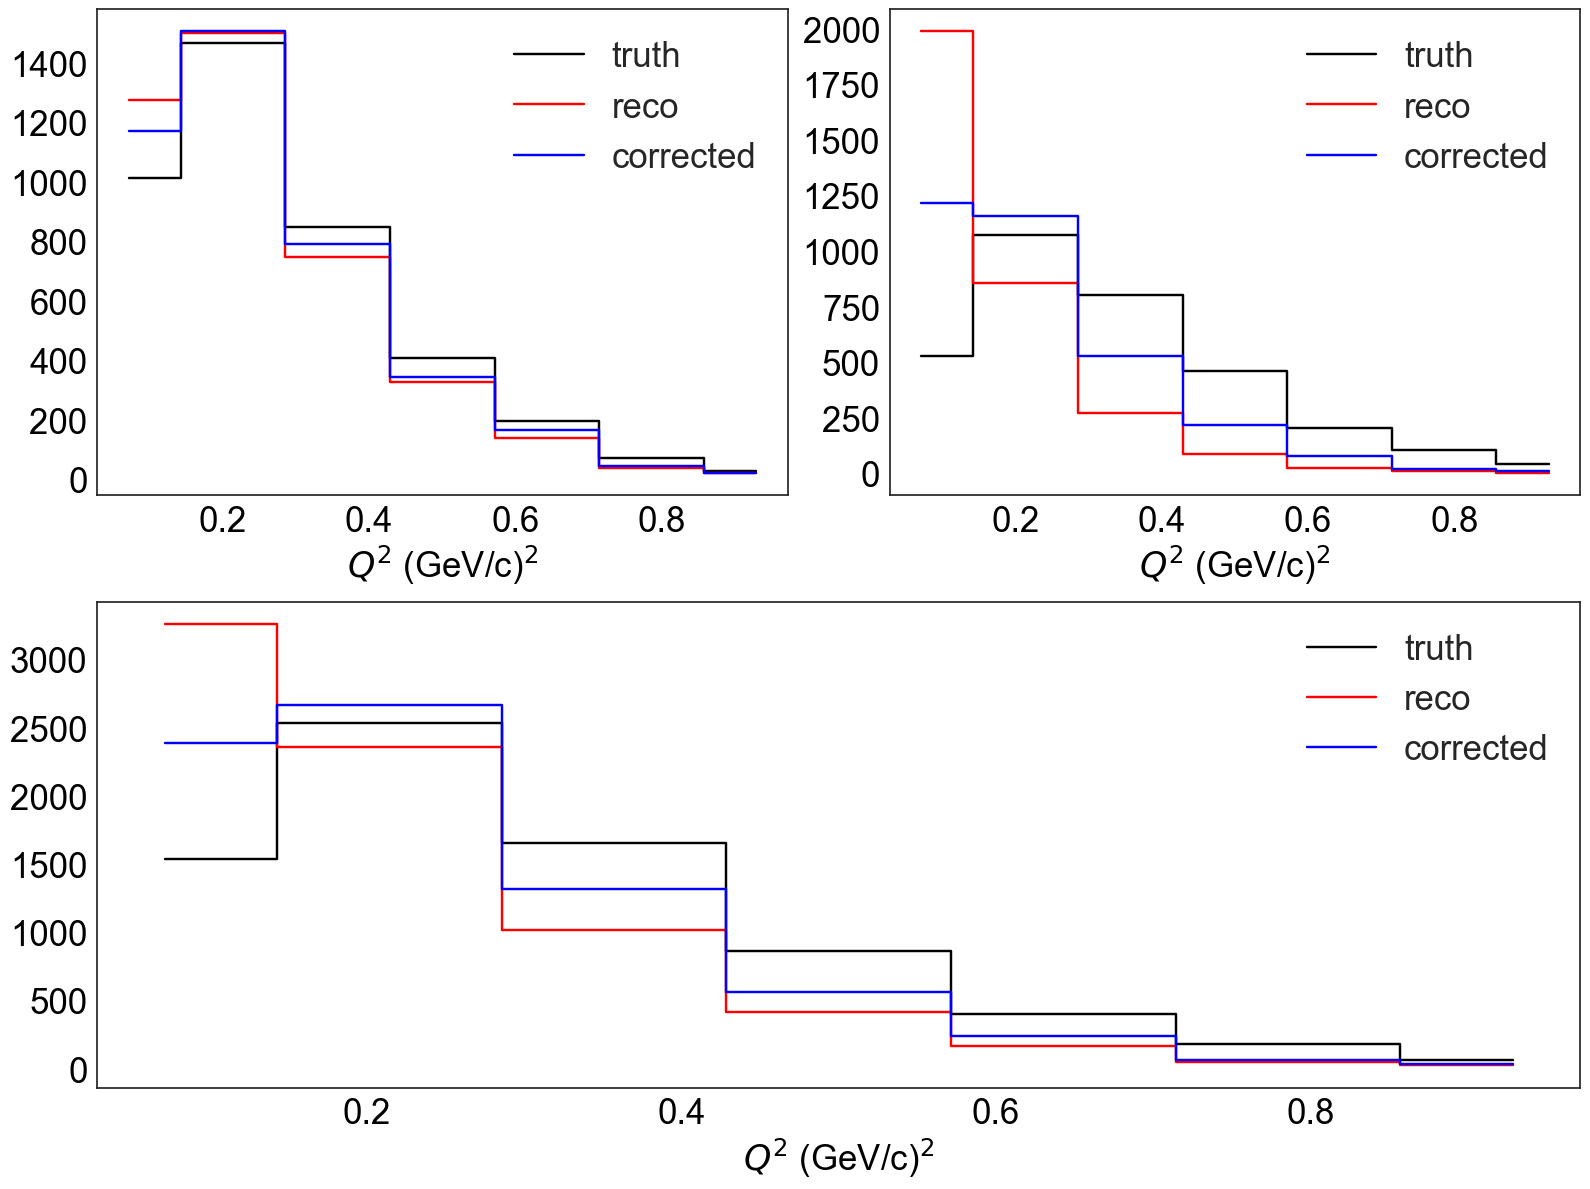

In [34]:

def Q2_from_sample(sam=None,label=''):
    Pmu       = sam[label+'_Pmu']
    if label=='corrected': label='reco' # only the muon momentum is corrected in this context
    Pmu_theta = sam[label+'_Pmu_theta']
    Pmu_phi   = sam[label+'_Pmu_phi']
    Pmu_x = Pmu*np.sin(Pmu_theta)*np.cos(Pmu_phi)
    Pmu_y = Pmu*np.sin(Pmu_theta)*np.sin(Pmu_phi)
    Pmu_z = Pmu*np.cos(Pmu_theta)
    Emu = np.sqrt(np.square(Pmu) + np.square(0.1056))
    q_x = -Pmu_x
    q_y = -Pmu_y
    q_z = sam[label+'_Ev']-Pmu_z
    omega = sam[label+'_Ev']-Emu
    Q2 = np.square(q_x)+np.square(q_y)+np.square(q_z) - np.square(omega)
    return Q2 



bins = linspace(0.,1.,8); mid=0.5*(bins[1:]+bins[:-1])
fig=plt.figure(figsize=(16,12))



# rec-'GOOD' sample
ax=fig.add_subplot(2,2,1)
Pmu_good_dict,_ = momentum_correction(sam = recgood)
recgood['corrected_Pmu'] = Pmu_good_dict['corr.']

Q2_good,h = dict(),dict()
for label,color in zip(['truth','reco','corrected']
                       ,['black','red','blue']):
    Q2_good[label] = Q2_from_sample(sam = recgood, label=label)
    h[label],_ = np.histogram(Q2_good[label],bins=bins)
    plt.step(mid,h[label],label=label,color=color,linestyle='-',where='mid')

set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=True)




# rec-'BAD' sample
ax=fig.add_subplot(2,2,2)
Pmu_bad_dict,_ = momentum_correction(sam = recbad)
recbad['corrected_Pmu'] = Pmu_bad_dict['corr.']

Q2_bad,h = dict(),dict()
for label,color in zip(['truth','reco','corrected']
                       ,['black','red','blue']):
    Q2_bad[label] = Q2_from_sample(sam = recbad, label=label)
    h[label],_ = np.histogram(Q2_bad[label],bins=bins)
    plt.step(mid,h[label],label=label,color=color,linestyle='-',where='mid')

set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=True)



# both samples
ax=fig.add_subplot(2,2,(3,4))
Pmu_bad_dict,_ = momentum_correction(sam = recbad)
h,Q2_concat=dict(),dict()
for label,color in zip(['truth','reco','corrected']
                       ,['black','red','blue']):
    Q2_concat[label] = pd.concat([Q2_good[label],Q2_bad[label]] )
    h[label],_ = np.histogram(Q2_concat[label],bins=bins)
    plt.step(mid,h[label],label=label,color=color,linestyle='-',where='mid')
set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=True)



plt.tight_layout()

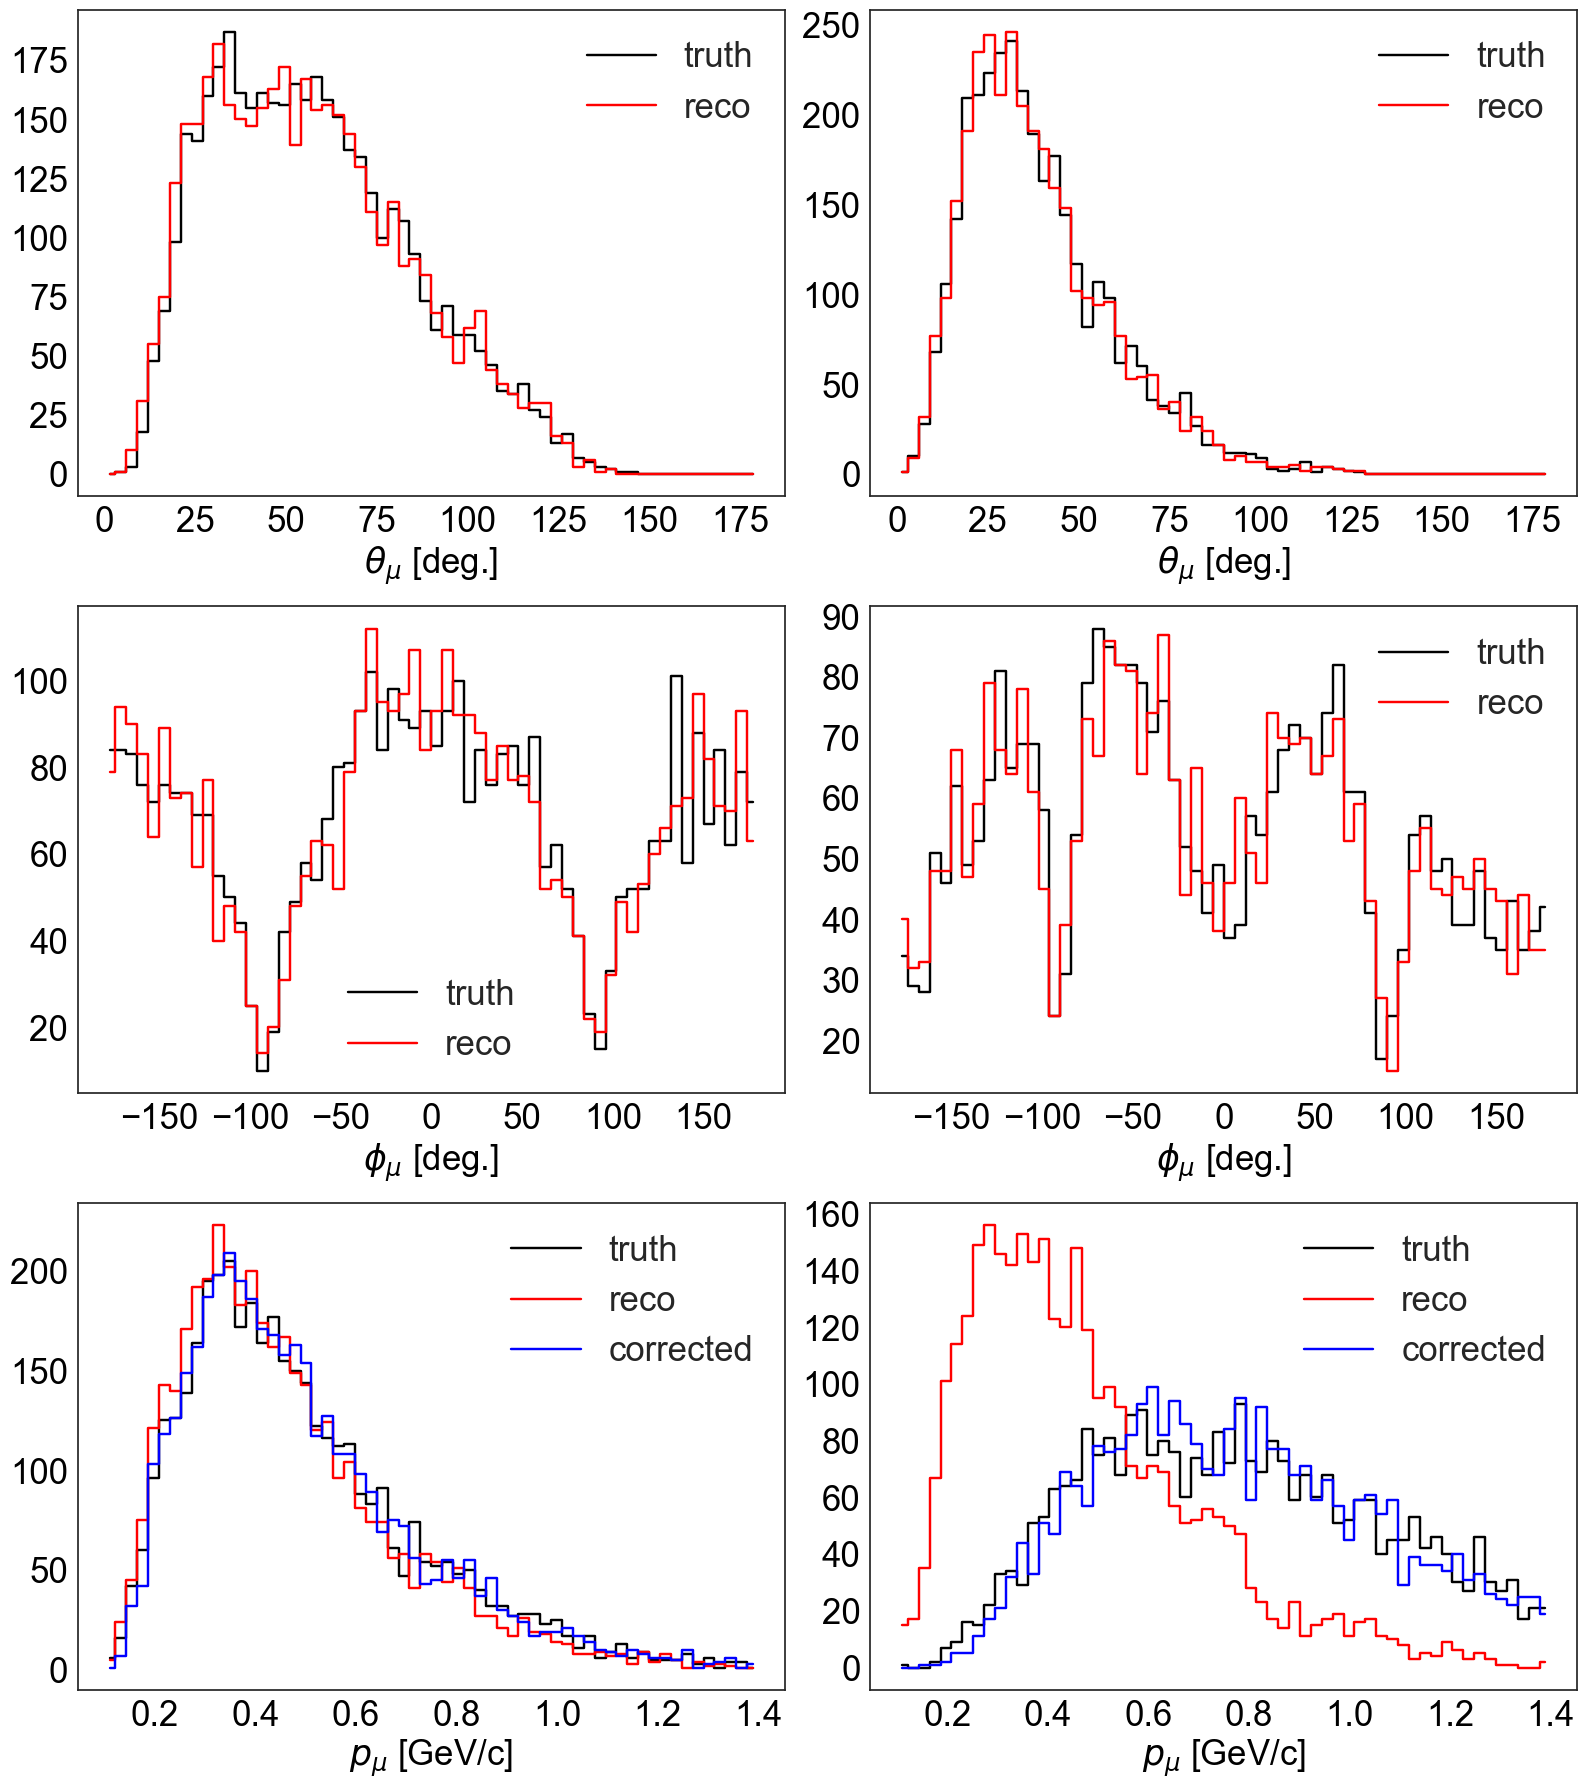

In [33]:
fig=plt.figure(figsize=(16,18))



# rec-'GOOD' sample
ax=fig.add_subplot(3,2,1)
for label,color in zip(['truth','reco']
                       ,['black','red']):
    hist,edges = np.histogram(180./np.pi*recgood[label+'_Pmu_theta'],bins=linspace(0.,180.,61))
    plt.step(0.5*(edges[1:]+edges[:-1]),hist,label=label,color=color,linestyle='-',where='mid')
set_axes(ax,r'$\theta_\mu$ [deg.]',do_add_legend=True)




ax=fig.add_subplot(3,2,3)
for label,color in zip(['truth','reco']
                       ,['black','red']):
    hist,edges = np.histogram(180./np.pi*recgood[label+'_Pmu_phi'],bins=linspace(-180,180,61))
    plt.step(0.5*(edges[1:]+edges[:-1]),hist,label=label,color=color,linestyle='-',where='mid')
set_axes(ax,r'$\phi_\mu$ [deg.]',do_add_legend=True)

ax=fig.add_subplot(3,2,5)
for label,color in zip(['truth','reco','corrected']
                       ,['black','red','blue']):
    hist,edges = np.histogram(recgood[label+'_Pmu'],bins=linspace(0.1,1.4,61))
    plt.step(0.5*(edges[1:]+edges[:-1]),hist,label=label,color=color,linestyle='-',where='mid')
set_axes(ax,r'$p_\mu$ [GeV/c]',do_add_legend=True)






# rec-'BAD' sample
ax=fig.add_subplot(3,2,2)
for label,color in zip(['truth','reco']
                       ,['black','red']):
    hist,edges = np.histogram(180./np.pi*recbad[label+'_Pmu_theta'],bins=linspace(0.,180.,61))
    plt.step(0.5*(edges[1:]+edges[:-1]),hist,label=label,color=color,linestyle='-',where='mid')
set_axes(ax,r'$\theta_\mu$ [deg.]',do_add_legend=True)




ax=fig.add_subplot(3,2,4)
for label,color in zip(['truth','reco']
                       ,['black','red']):
    hist,edges = np.histogram(180./np.pi*recbad[label+'_Pmu_phi'],bins=linspace(-180,180,61))
    plt.step(0.5*(edges[1:]+edges[:-1]),hist,label=label,color=color,linestyle='-',where='mid')
set_axes(ax,r'$\phi_\mu$ [deg.]',do_add_legend=True)

ax=fig.add_subplot(3,2,6)
for label,color in zip(['truth','reco','corrected']
                       ,['black','red','blue']):
    hist,edges = np.histogram(recbad[label+'_Pmu'],bins=linspace(0.1,1.4,61))
    plt.step(0.5*(edges[1:]+edges[:-1]),hist,label=label,color=color,linestyle='-',where='mid')
set_axes(ax,r'$p_\mu$ [GeV/c]',do_add_legend=True)


plt.tight_layout()